# CA1 Sem 1 Repeat Housing / Construction Data Assignment for sba22232

## Importing the libaries I plan on using during my assignment -

In [1]:
import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import re
import missingno as msno 
import sklearn
import requests
import json
import string
from string import punctuation

import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
nltk.download('vader_lexicon')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import pmdarima as pm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

import tweepy
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/somsteph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/somsteph/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to /Users/somsteph/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/somsteph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data prep on both Datasets

In [2]:
# List of the file names
file_names = ['ppr-2011-dublin.csv', 
              'ppr-2012-dublin.csv', 
              'ppr-2013-dublin.csv', 
              'ppr-2014-dublin.csv', 
              'ppr-2015-dublin.csv', 
              'ppr-2016-dublin.csv', 
              'ppr-2017-dublin.csv', 
              'ppr-2018-dublin.csv', 
              'ppr-2019-dublin.csv', 
              'ppr-2020.csv']

In [3]:
# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

In [4]:
# Loop through the list of file names and append the data to the combined_data DataFrame
for file_name in file_names:
    data = pd.read_csv(file_name)
    combined_data = pd.concat([combined_data, data], axis=0)

In [5]:
# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [6]:
# Read in the combined data CSV file
data = pd.read_csv('combined_data.csv')
data.head()

Date of Sale (dd/mm/yyyy)                                  Address  \
0                01/01/2011              251 Clontarf Road, Clontarf   
1                04/01/2011        22 St. Patrick's Park, Clondalkin   
2                04/01/2011             46 Longmeadows, Islandbridge   
3                04/01/2011      60 WOODSIDE, RATHFARNHAM, DUBLIN 14   
4                04/01/2011  9 Shandon Crescent, Phibsboro, Dublin 7   

  Postal Code  County Price (Eur) Not Full Market Price VAT Exclusive  \
0    Dublin 3  Dublin  108,532.00                   Yes            No   
1         NaN  Dublin  360,000.00                    No            No   
2    Dublin 8  Dublin  254,000.00                    No            No   
3   Dublin 14  Dublin  445,000.00                    No            No   
4         NaN  Dublin  220,000.00                   Yes            No   

                 Description of Property Property Size Description  
0  Second-Hand Dwelling house /Apartment                       NaN  
1  Second-Hand Dwelling house /Apartment                       NaN  
2  Second-Hand Dwelling house /Apartment                       NaN  
3  Second-Hand Dwelling house /Apartment                       NaN  
4  Second-Hand Dwelling house /Apartment                       NaN

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166342 entries, 0 to 166341
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  166342 non-null  object
 1   Address                    166342 non-null  object
 2   Postal Code                77825 non-null   object
 3   County                     166342 non-null  object
 4   Price (Eur)                166342 non-null  object
 5   Not Full Market Price      166342 non-null  object
 6   VAT Exclusive              166342 non-null  object
 7   Description of Property    166342 non-null  object
 8   Property Size Description  17515 non-null   object
dtypes: object(9)
memory usage: 11.4+ MB


In [8]:
data.shape

(166342, 9)

In [9]:
data.describe()

Date of Sale (dd/mm/yyyy)                         Address Postal Code  \
count                     166342                          166342       77825   
unique                      2919                          160505          31   
top                   18/12/2020  WALLSLOUGH VILLAGE, WALLSLOUGH   Dublin 15   
freq                         847                               7        9672   

        County Price (Eur) Not Full Market Price VAT Exclusive  \
count   166342      166342                166342        166342   
unique      26       14918                     2             2   
top     Dublin  250,000.00                    No            No   
freq    131732        1809                158478        137254   

                      Description of Property  \
count                                  166342   
unique                                      4   
top     Second-Hand Dwelling house /Apartment   
freq                                   136763   

                                Property Size Description  
count                                               17515  
unique                                                  5  
top     greater than or equal to 38 sq metres and less...  
freq                                                13467

In [10]:
(data.isnull().sum()/(len(data)))*100

Date of Sale (dd/mm/yyyy)     0.000000
Address                       0.000000
Postal Code                  53.213861
County                        0.000000
Price (Eur)                   0.000000
Not Full Market Price         0.000000
VAT Exclusive                 0.000000
Description of Property       0.000000
Property Size Description    89.470489
dtype: float64

In [11]:
data['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/¡ras·n CÛnaithe Ath·imhe',
       'Teach/?ras?n C?naithe Nua'], dtype=object)

In [12]:
data['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'less than 38 sq metres', 'greater than 125 sq metres',
       'n?os l? n? 38 m?adar cearnach',
       'greater than or equal to 125 sq metres'], dtype=object)

In [13]:
data['Postal Code'].unique()

array(['Dublin 3', nan, 'Dublin 8', 'Dublin 14', 'Dublin 1', 'Dublin 7',
       'Dublin 4', 'Dublin 12', 'Dublin 5', 'Dublin 2', 'Dublin 16',
       'Dublin 9', 'Dublin 20', 'Dublin 15', 'Dublin 6', 'Dublin 22',
       'Dublin 6w', 'Dublin 17', 'Dublin 13', 'Dublin 11', 'Dublin 24',
       'Dublin 18', 'Dublin 10', 'Baile ¡tha Cliath 14',
       'Baile ?tha Cliath 17', 'Baile ¡tha Cliath 5', 'NÌ Bhaineann',
       'Baile ¡tha Cliath 3', 'Baile ¡tha Cliath 15',
       'Baile ¡tha Cliath 4', 'Baile ¡tha Cliath 9',
       'Baile ¡tha Cliath 18'], dtype=object)

In [14]:
data['County'].unique()

array(['Dublin', 'Tipperary', 'Kerry', 'Meath', 'Carlow', 'Kildare',
       'Waterford', 'Limerick', 'Louth', 'Roscommon', 'Cork', 'Clare',
       'Offaly', 'Laois', 'Galway', 'Leitrim', 'Donegal', 'Kilkenny',
       'Wexford', 'Longford', 'Cavan', 'Sligo', 'Wicklow', 'Mayo',
       'Westmeath', 'Monaghan'], dtype=object)

In [15]:
data.duplicated().sum()

199

In [16]:
# 1. Delete rows where County is not Dublin
data = data[~(data['County'] != 'Dublin')]

In [17]:
# 2. Remove rows with blank Postal Code
data = data.dropna(subset=['Postal Code'])

In [18]:
# 3. Drop Property Size Description column
data = data.drop('Property Size Description', axis=1)

In [19]:
# 4. Split Address column by comma and keep only first two columns
data[['Address Line 1', 'Address Line 2']] = data['Address'].str.split(',', 1, expand=True)
data = data.drop('Address', axis=1)

In [20]:
# 5. Drop rows containing "Teach/¡ras·n CÛnaithe Ath·imhe" and "Teach/?ras?n C?naithe Nua"
data = data[~data['Description of Property'].isin(["Teach/¡ras·n CÛnaithe Ath·imhe", "Teach/?ras?n C?naithe Nua"])]

In [21]:
# 6. Replace commas with empty strings in the 'Price (Eur)' column
data['Price (Eur)'] = data['Price (Eur)'].str.replace(',', '')

In [22]:
# 7. Convert the 'Price (Eur)' column to a float dtype
data['Price (Eur)'] = data['Price (Eur)'].astype(float)

In [23]:
# 8. Convert the 'Date of Sale (dd/mm/yyyy)' column to a date dtype
data['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)'])

In [24]:
# 9. Drop rows containing "Yes" for "Not Full Market Price"
data = data[~data['Not Full Market Price'].isin(["Yes"])]

In [25]:
# 10. Split the 'Postal Code' column and keep only the number element
data['Dub_Code'] = data['Postal Code'].str.split().str[1]

In [26]:
# 11. Drop rows containing "6w"
data = data[~data['Dub_Code'].isin(["6w"])]

In [27]:
# 12. Split the 'Date of Sale (dd/mm/yyyy)' column and created a new column with only Year
data['Year'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)']).dt.year

In [28]:
# 11. create a new column with year only
data['Year'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)']).dt.year

In [29]:
# 13. Remove values not between 100000 & 2000000, removes site & commerical sales - Abitrary decision based on personal experience
data.drop(data[(data['Price (Eur)'] < 100000.00) | (data['Price (Eur)'] > 1000000.00)].index, inplace=True)

In [30]:
# Save the modified DataFrame to a new CSV file
data.to_csv('dublin_data.csv', index=False)

In [31]:
df1 = pd.read_csv('dublin_data.csv')
df1.head()

Date of Sale (dd/mm/yyyy) Postal Code  County  Price (Eur)  \
0                2011-04-01    Dublin 8  Dublin     254000.0   
1                2011-04-01   Dublin 14  Dublin     445000.0   
2                2011-04-01    Dublin 1  Dublin     290500.0   
3                2011-05-01    Dublin 7  Dublin     290000.0   
4                2011-05-01    Dublin 4  Dublin     190000.0   

  Not Full Market Price VAT Exclusive                Description of Property  \
0                    No            No  Second-Hand Dwelling house /Apartment   
1                    No            No  Second-Hand Dwelling house /Apartment   
2                    No            No  Second-Hand Dwelling house /Apartment   
3                    No            No  Second-Hand Dwelling house /Apartment   
4                    No            No  Second-Hand Dwelling house /Apartment   

                 Address Line 1                  Address Line 2  Dub_Code  \
0                46 Longmeadows                    Islandbridge         8   
1                   60 WOODSIDE          RATHFARNHAM, DUBLIN 14        14   
2  Apartment 24 Baltrasna House   Spencer Dock, North Wall Quay         1   
3          13 Linenhall Terrace                      Broadstone         7   
4           2 Pembroke Cottages              Ringsend, Dublin 4         4   

   Year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [32]:
df1 = df1.reindex(columns=['Date of Sale (dd/mm/yyyy)', 'Year', 'Address Line 1', 'Address Line 2', 'Postal Code', 'Dub_Code', 'Price (Eur)', 'VAT Exclusive', 'Description of Property'])
df1.head()

Date of Sale (dd/mm/yyyy)  Year                Address Line 1  \
0                2011-04-01  2011                46 Longmeadows   
1                2011-04-01  2011                   60 WOODSIDE   
2                2011-04-01  2011  Apartment 24 Baltrasna House   
3                2011-05-01  2011          13 Linenhall Terrace   
4                2011-05-01  2011           2 Pembroke Cottages   

                   Address Line 2 Postal Code  Dub_Code  Price (Eur)  \
0                    Islandbridge    Dublin 8         8     254000.0   
1          RATHFARNHAM, DUBLIN 14   Dublin 14        14     445000.0   
2   Spencer Dock, North Wall Quay    Dublin 1         1     290500.0   
3                      Broadstone    Dublin 7         7     290000.0   
4              Ringsend, Dublin 4    Dublin 4         4     190000.0   

  VAT Exclusive                Description of Property  
0            No  Second-Hand Dwelling house /Apartment  
1            No  Second-Hand Dwelling house /Apartment  
2            No  Second-Hand Dwelling house /Apartment  
3            No  Second-Hand Dwelling house /Apartment  
4            No  Second-Hand Dwelling house /Apartment

In [33]:
df1.select_dtypes(exclude="number").describe()

Date of Sale (dd/mm/yyyy) Address Line 1          Address Line 2  \
count                      68641          68641                   68641   
unique                      2685          63054                   13175   
top                   2015-01-28          APT 1   CLONDALKIN, DUBLIN 22   
freq                         305            220                    1042   

       Postal Code VAT Exclusive                Description of Property  
count        68641         68641                                  68641  
unique          21             2                                      2  
top      Dublin 15            No  Second-Hand Dwelling house /Apartment  
freq          8647         60181                                  60065

In [34]:
df1['Postal Code'].unique()

array(['Dublin 8', 'Dublin 14', 'Dublin 1', 'Dublin 7', 'Dublin 4',
       'Dublin 12', 'Dublin 5', 'Dublin 2', 'Dublin 16', 'Dublin 9',
       'Dublin 20', 'Dublin 15', 'Dublin 6', 'Dublin 3', 'Dublin 22',
       'Dublin 17', 'Dublin 13', 'Dublin 11', 'Dublin 24', 'Dublin 18',
       'Dublin 10'], dtype=object)

# Both Datasets are cleaned and prepared for analysis, next I will run through my Descriptive analysis

### EU House Price index Dataset

In [35]:
pi = pd.read_csv('priceindexcities.csv')
pi.head()

Geo  Price_Index  Year Quarter
0  AT        74.05  2010      Q1
1  AT        76.54  2010      Q2
2  AT        78.16  2010      Q3
3  AT        78.44  2010      Q4
4  AT        79.01  2011      Q1

In [36]:
pi.tail()

Geo  Price_Index  Year Quarter
1716  SK       163.28  2021      Q4
1717  SK       166.46  2022      Q1
1718  SK       175.62  2022      Q2
1719  SK       180.61  2022      Q3
1720  SK       179.18  2022      Q4

In [37]:
pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo          1721 non-null   object 
 1   Price_Index  1721 non-null   float64
 2   Year         1721 non-null   int64  
 3   Quarter      1721 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.9+ KB


In [38]:
pi.describe()

Price_Index         Year
count  1721.000000  1721.000000
mean    111.536299  2014.134224
std      26.383636     4.915684
min      49.470000  2005.000000
25%      95.950000  2010.000000
50%     105.410000  2014.000000
75%     123.770000  2018.000000
max     261.440000  2022.000000

In [39]:
pi.select_dtypes(exclude="number").head()

Geo Quarter
0  AT      Q1
1  AT      Q2
2  AT      Q3
3  AT      Q4
4  AT      Q1

In [40]:
pi.select_dtypes(exclude="number").describe()

Geo Quarter
count   1721    1721
unique    26       4
top       IE      Q4
freq      72     431

In [41]:
pi.shape

(1721, 4)

In [42]:
(pi.isnull().sum()/(len(data)))*100

Geo            0.0
Price_Index    0.0
Year           0.0
Quarter        0.0
dtype: float64

In [43]:
pi['Geo'].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT',
       'RO', 'SE', 'SI', 'SK'], dtype=object)

In [44]:
pi['Price_Index'].unique()

array([ 74.05,  76.54,  78.16, ..., 175.62, 180.61, 179.18])

In [45]:
pi['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2005, 2006, 2007, 2008, 2009])

In [46]:
pi['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

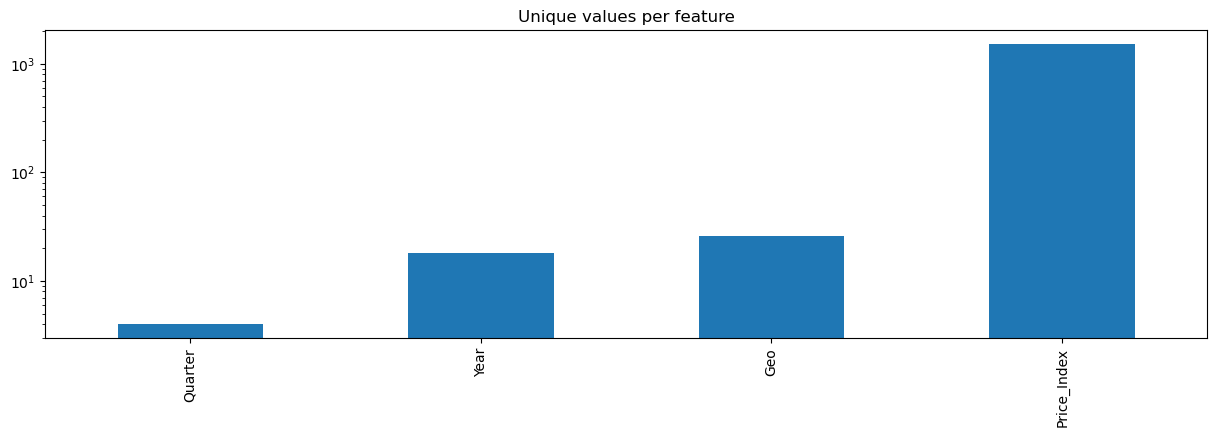

In [47]:
# For each numerical feature compute number of unique entries
unique_values = pi.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [48]:
pi.duplicated().sum()

0

In [49]:
pi.isna()

Geo  Price_Index   Year  Quarter
0     False        False  False    False
1     False        False  False    False
2     False        False  False    False
3     False        False  False    False
4     False        False  False    False
...     ...          ...    ...      ...
1716  False        False  False    False
1717  False        False  False    False
1718  False        False  False    False
1719  False        False  False    False
1720  False        False  False    False

[1721 rows x 4 columns]

<AxesSubplot:>

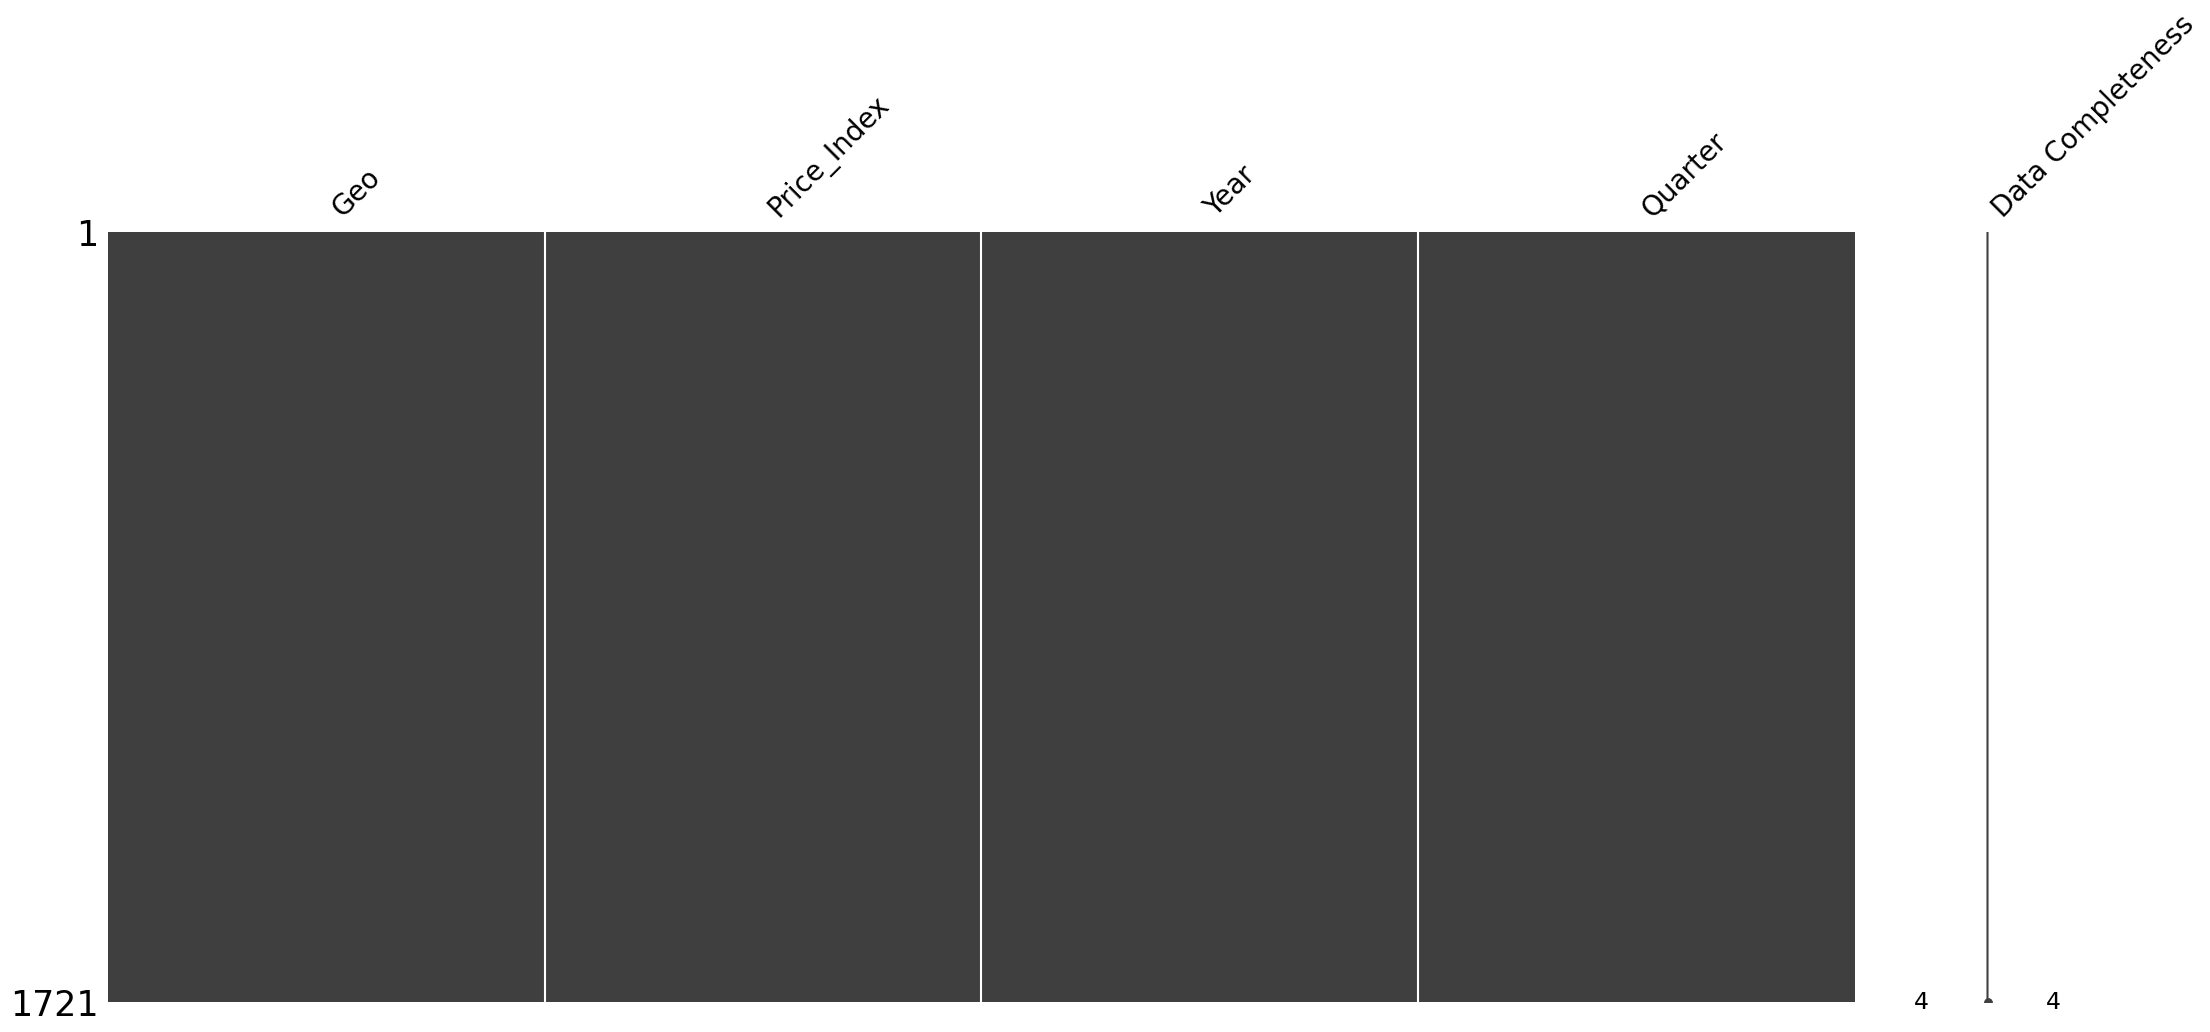

In [50]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(pi, labels=True, sort="descending", fontsize=20)

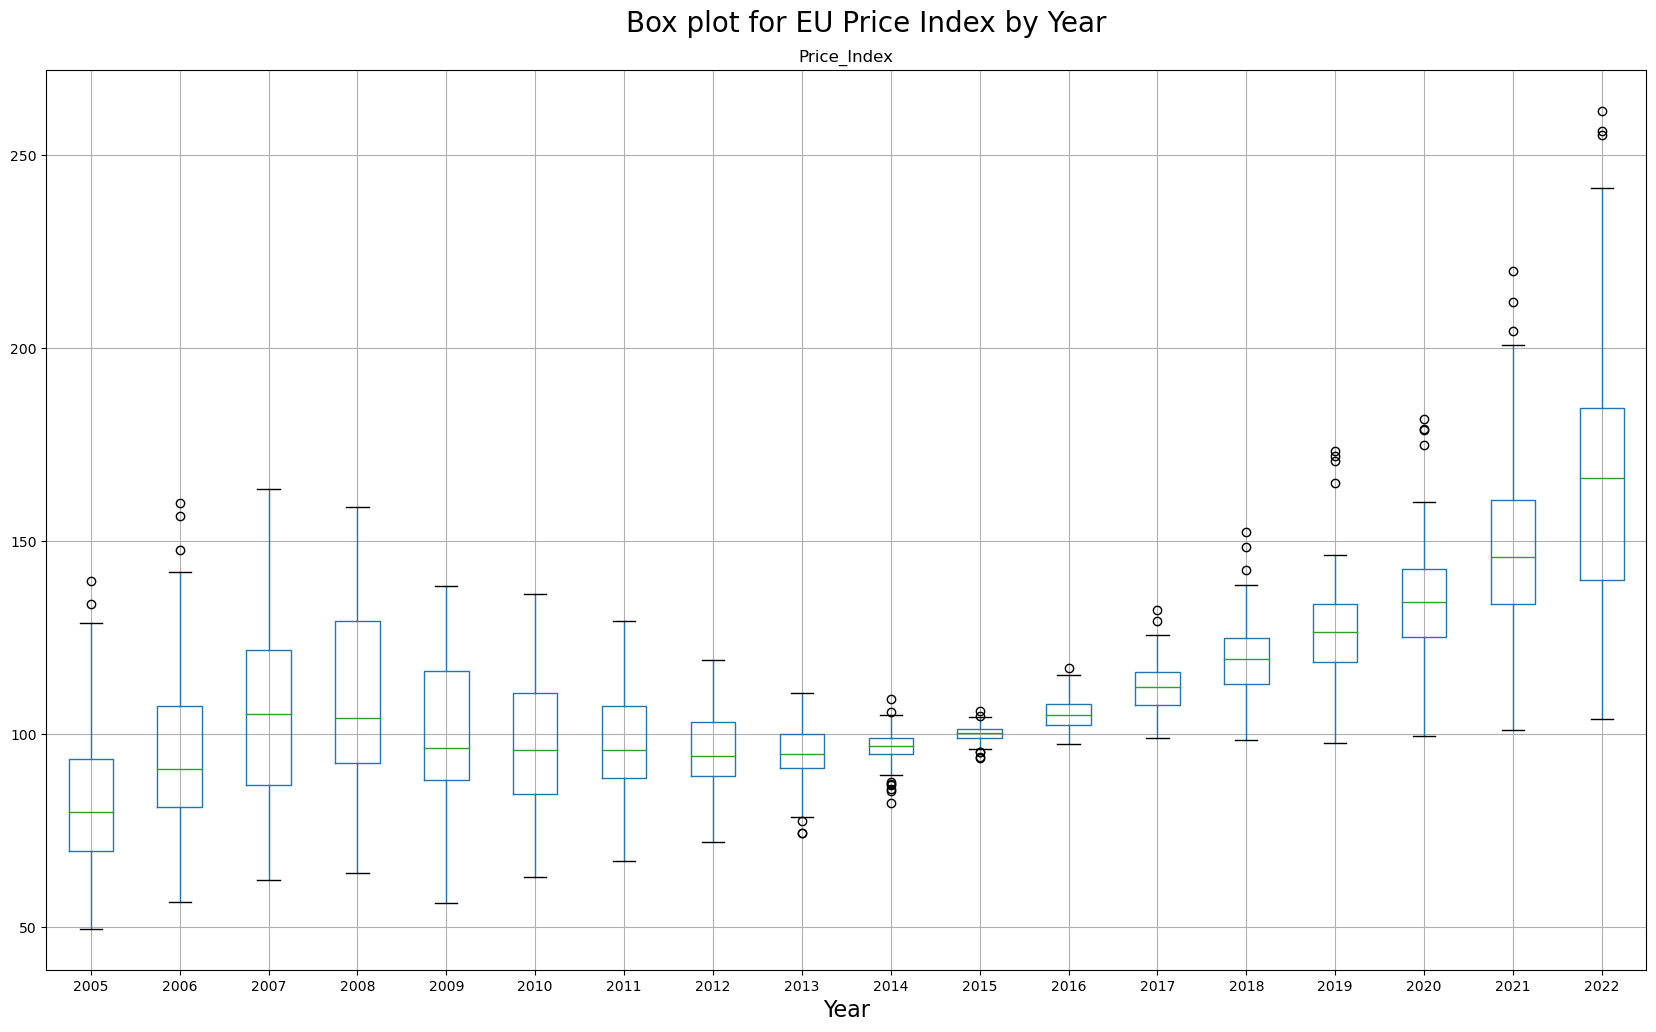

In [51]:
# Creates a boxplot to show an Element based on Item and Value
pi.boxplot(column =['Price_Index'], by = ['Year'], figsize =(20,12))

plt.suptitle("Box plot for EU Price Index by Year", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Year", fontsize=16)

plt.show()

In [52]:
# Here I group the data by Country and Price Index then sort by the mean column to identify where Ireland sits on the list.
group_code = pi.groupby('Geo')['Price_Index'].describe()

result_pi = group_code.sort_values('mean', ascending=False)

result_pi

count        mean        std    min       25%      50%       75%     max
Geo                                                                          
HU    64.0  127.318750  49.332366  84.13   91.9250  101.975  155.4975  261.44
ES    69.0  122.725942  17.185359  95.20  105.7800  126.260  136.2600  150.90
IE    72.0  121.881667  27.989342  74.32   99.6350  126.630  141.7350  168.52
SI    64.0  121.822187  19.215013  97.77  108.5275  118.060  129.1400  178.41
CZ    60.0  121.613333  36.583953  93.60   95.3750  101.900  138.0500  219.40
PT    60.0  121.126333  29.013951  92.25  100.6300  107.530  138.0175  195.91
LV    68.0  119.462353  29.404879  78.52   95.8075  110.470  144.0100  187.79
NL    72.0  119.285417  23.536081  95.02  104.9175  111.595  122.6425  189.33
HR    60.0  116.572000  16.483035  99.13  104.6100  110.920  123.3950  170.11
BG    72.0  116.029444  23.410045  76.01   98.2975  108.760  131.9925  175.14
PL    52.0  115.430000  20.849638  97.15  100.5800  105.875  124.4575  169.64
RO    56.0  115.390714  14.667941  96.01  101.0050  114.520  126.6250  146.83
LT    68.0  115.274853  29.792208  82.75   90.2300  107.130  130.2025  203.46
AT    52.0  112.541923  27.644495  74.05   91.3975  109.110  128.3100  174.91
SK    68.0  112.467941  25.563807  71.76   94.8400  103.185  121.7575  180.61
LU    64.0  109.040156  34.569739  72.67   81.1925   97.625  124.1900  192.30
CY    72.0  108.146389   8.308510  93.41  102.7350  106.375  112.4200  130.42
IT    52.0  105.717308   7.627112  97.70   99.6750  102.600  110.2750  120.70
DE    72.0  104.966667  25.762469  80.00   83.7250   93.450  121.2250  166.60
FR    72.0  104.827361  10.743946  79.81   99.6850  102.550  107.5975  134.34
DK    72.0  104.232917  16.520429  75.49   90.9450  103.115  114.4050  142.51
MT    72.0  101.377639  22.017064  56.48   90.0200   94.885  117.0750  147.24
EE    72.0  101.328750  33.104595  50.59   74.9150   99.950  116.5000  191.38
BE    72.0  100.613472  15.585909  69.68   90.1425   98.560  109.1325  136.33
FI    72.0   97.134167   9.570368  73.62   88.8000   99.980  103.1675  113.81
SE    72.0   92.119444  26.644266  49.47   69.2225   83.980  115.0175  142.86

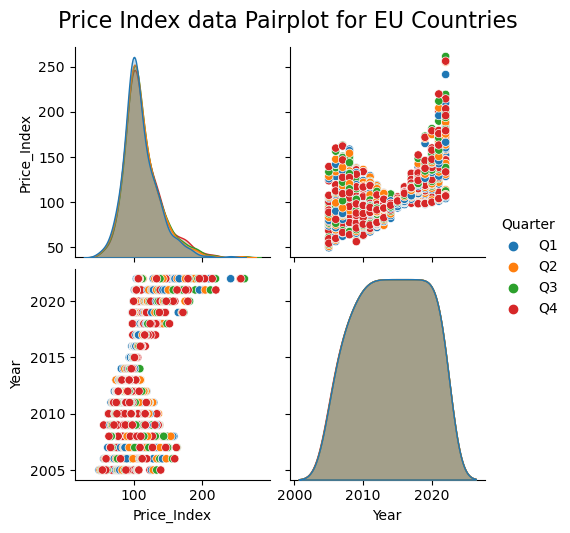

In [53]:
# Here I am using Pairplot here to further identify any additonal correlations in the data for the EU

ax_ptrans = sns.pairplot(pi, hue='Quarter')

plt.suptitle("Price Index data Pairplot for EU Countries", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

array([[<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>]], dtype=objec

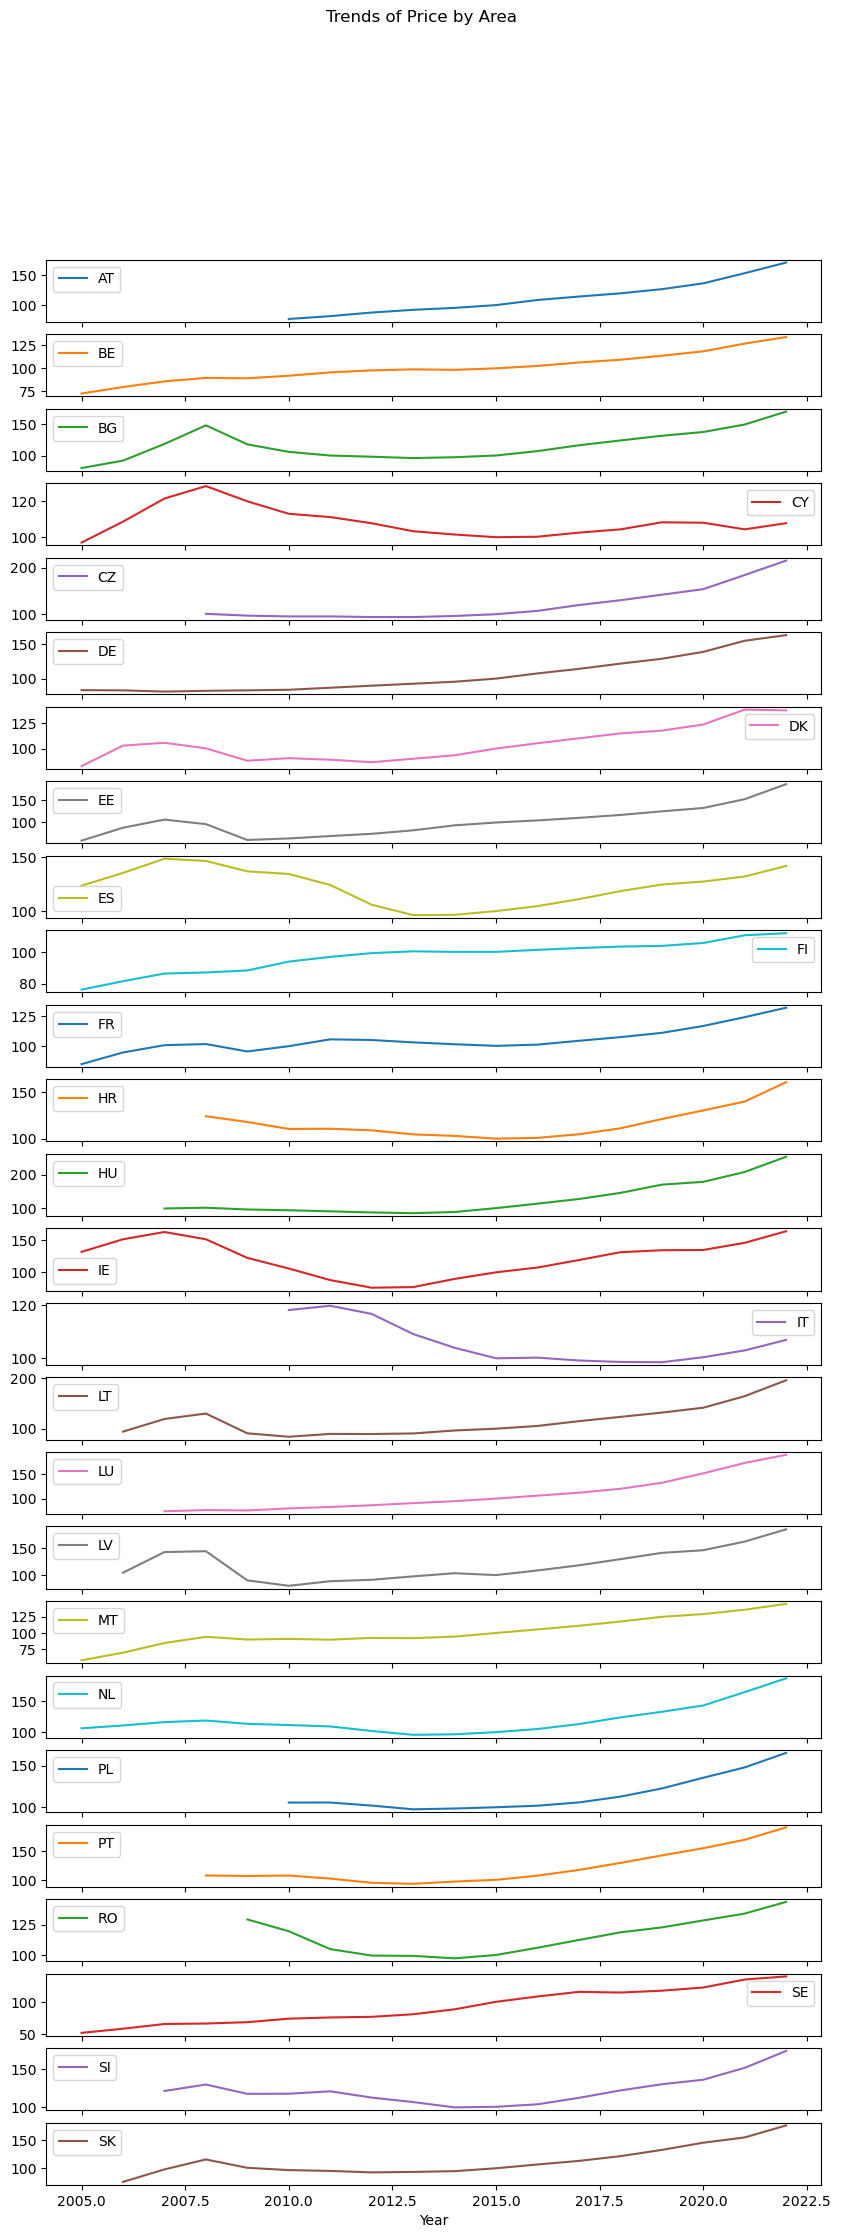

In [54]:
pd.pivot_table(pi.reset_index(),
               index='Year', columns='Geo', values='Price_Index'
              ).plot(subplots=True, layout=(26,1), figsize =(10,25), title=('Trends of Price by Area'))

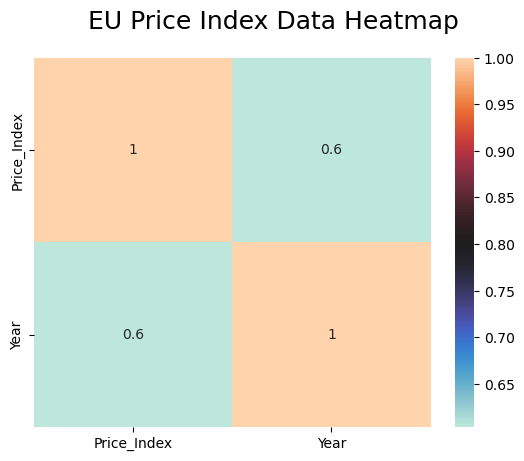

In [55]:
corelation = pi.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap="icefire")

plt.suptitle("EU Price Index Data Heatmap", fontsize=18, color="Black")

plt.show()

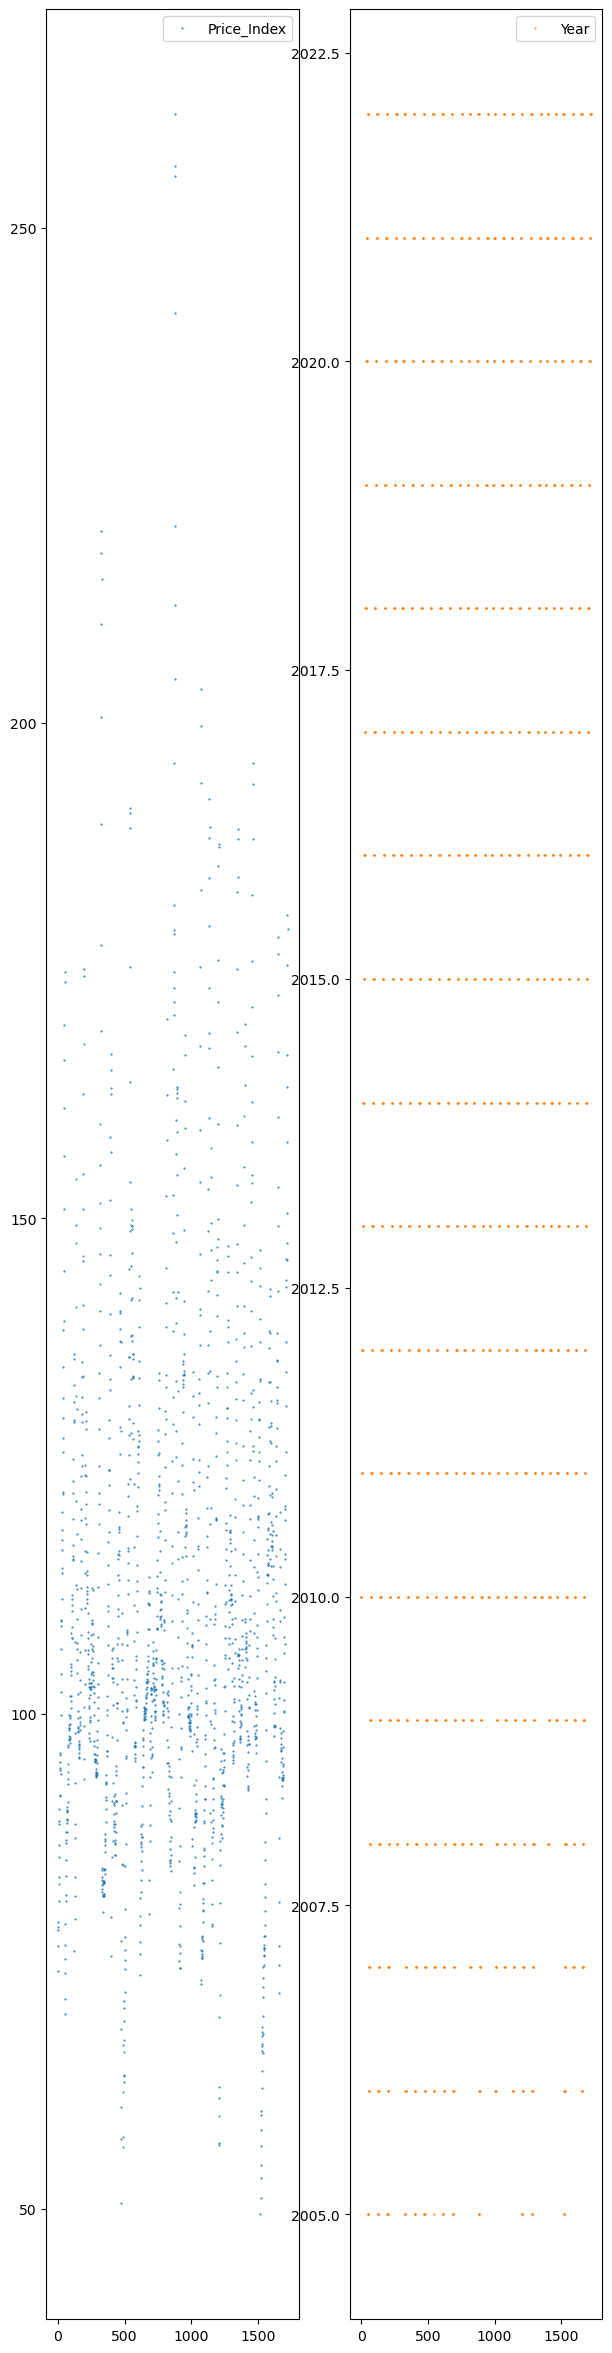

In [56]:
# Displays a global view of the dataset for only numerical features
pi.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

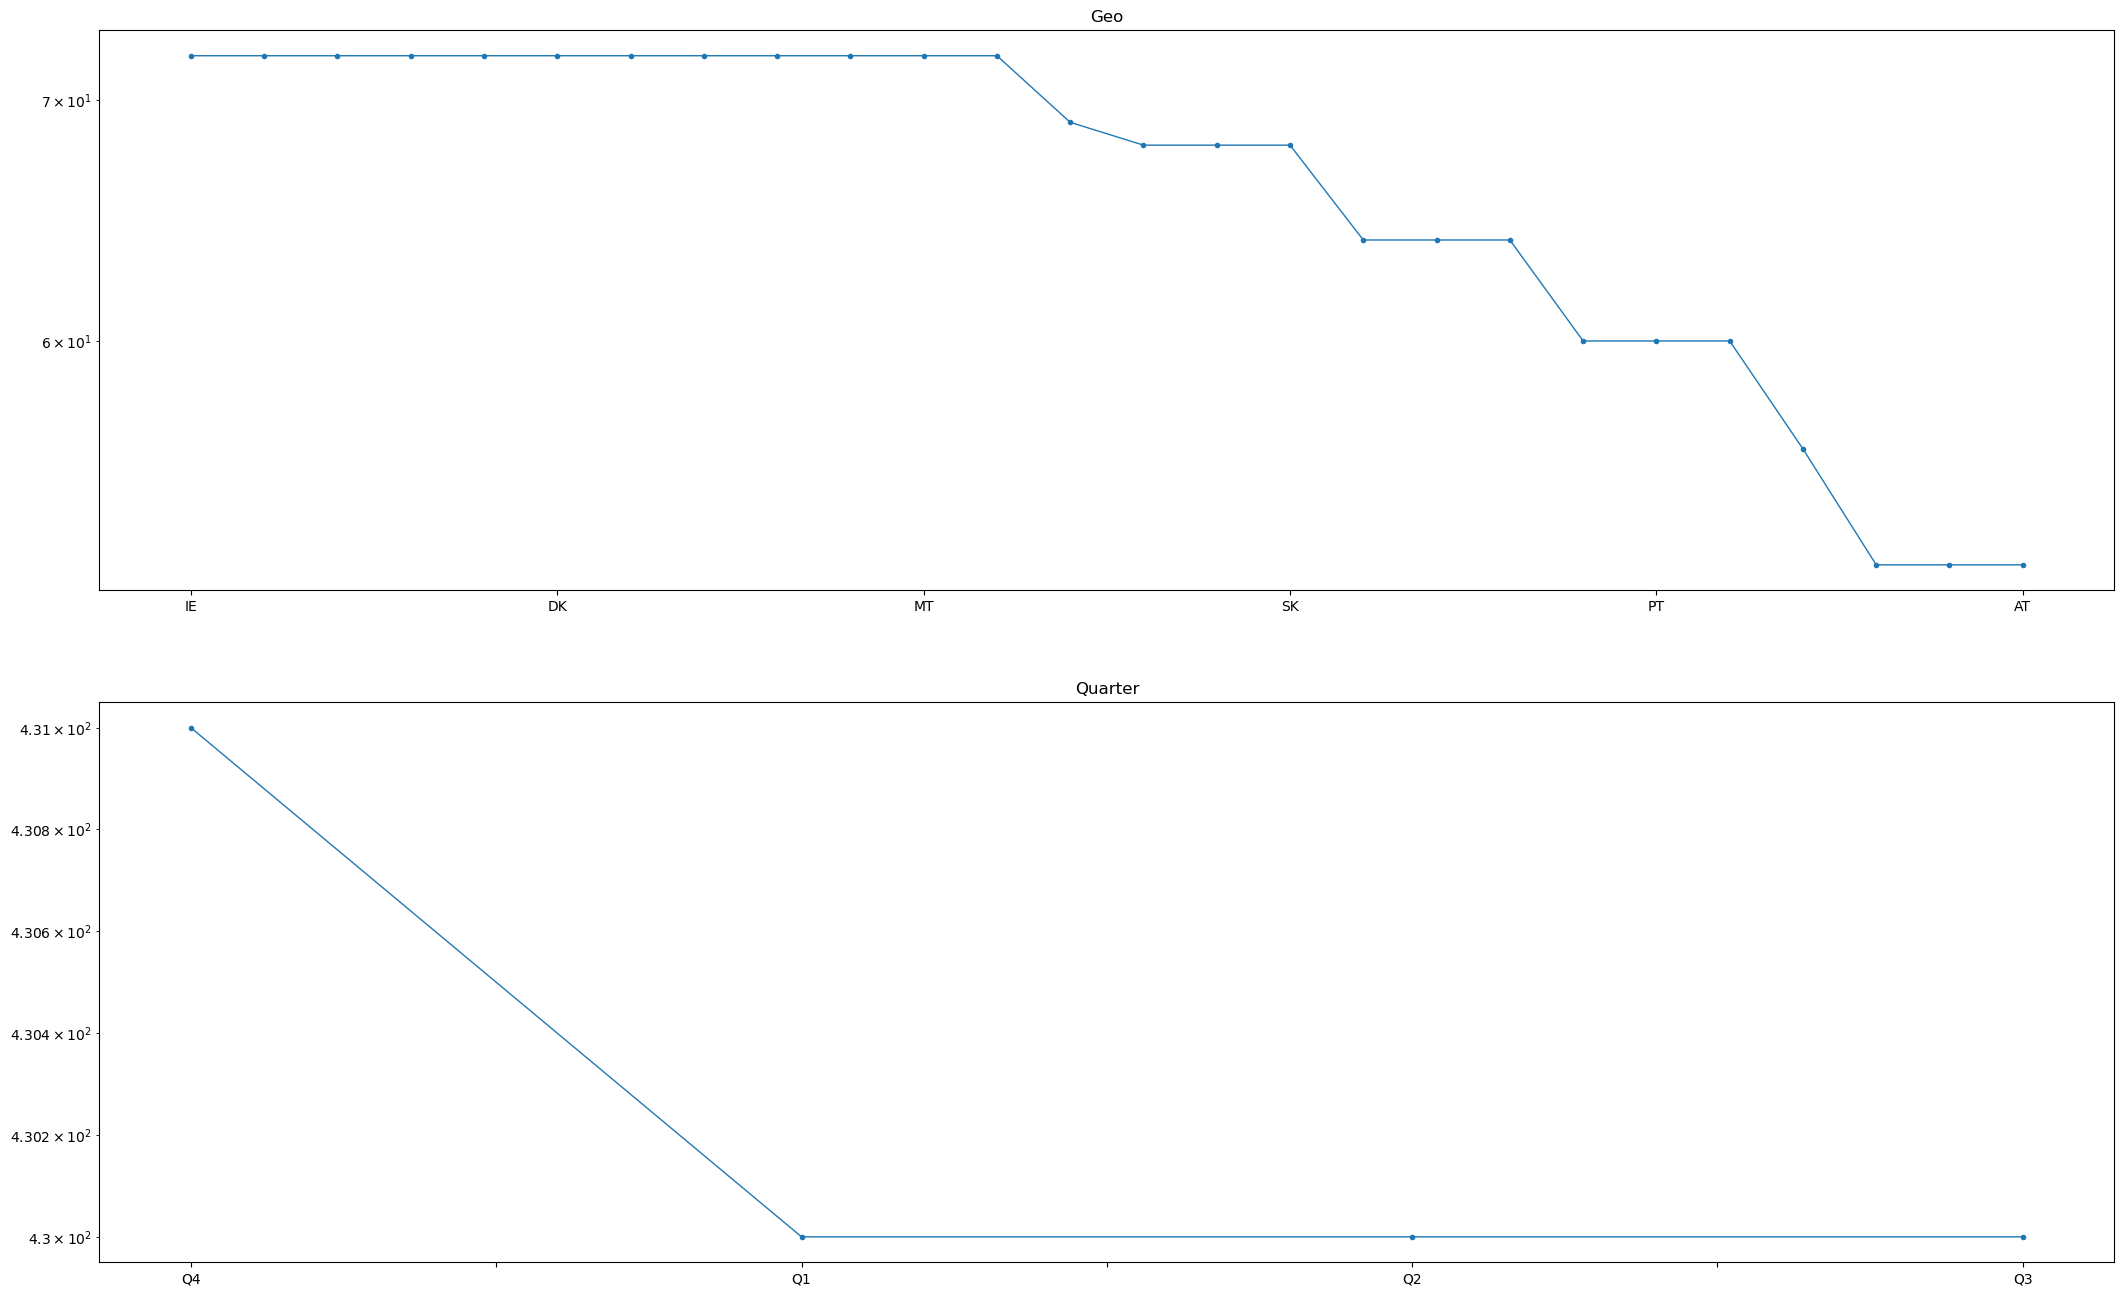

In [57]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(26, 16))

# Identify non-numerical features
pi_non_numerical = pi.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(pi_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    pi_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

### Dublin House Price Dataset 

In [58]:
df1.head()

Date of Sale (dd/mm/yyyy)  Year                Address Line 1  \
0                2011-04-01  2011                46 Longmeadows   
1                2011-04-01  2011                   60 WOODSIDE   
2                2011-04-01  2011  Apartment 24 Baltrasna House   
3                2011-05-01  2011          13 Linenhall Terrace   
4                2011-05-01  2011           2 Pembroke Cottages   

                   Address Line 2 Postal Code  Dub_Code  Price (Eur)  \
0                    Islandbridge    Dublin 8         8     254000.0   
1          RATHFARNHAM, DUBLIN 14   Dublin 14        14     445000.0   
2   Spencer Dock, North Wall Quay    Dublin 1         1     290500.0   
3                      Broadstone    Dublin 7         7     290000.0   
4              Ringsend, Dublin 4    Dublin 4         4     190000.0   

  VAT Exclusive                Description of Property  
0            No  Second-Hand Dwelling house /Apartment  
1            No  Second-Hand Dwelling house /Apartment  
2            No  Second-Hand Dwelling house /Apartment  
3            No  Second-Hand Dwelling house /Apartment  
4            No  Second-Hand Dwelling house /Apartment

In [59]:
df1.tail()

Date of Sale (dd/mm/yyyy)  Year         Address Line 1  \
68636                2020-12-30  2020             9 THE LAWN   
68637                2020-12-31  2020         10 HARTY PLACE   
68638                2020-12-31  2020       23 BEECHFIELD RD   
68639                2020-12-31  2020  30 LOWER RATHMINES RD   
68640                2020-12-31  2020         53 TRIMBLESTON   

                  Address Line 2 Postal Code  Dub_Code  Price (Eur)  \
68636    BODEN PARK, RATHFARNHAM   Dublin 16        16     490000.0   
68637   CLANBRASSIL ST, DUBLIN 8    Dublin 8         8     214000.0   
68638          CLONEE, DUBLIN 15   Dublin 15        15     300000.0   
68639           DUBLIN 6, DUBLIN    Dublin 6         6     950000.0   
68640       GOATSTOWN, DUBLIN 14   Dublin 14        14     400000.0   

      VAT Exclusive                Description of Property  
68636            No  Second-Hand Dwelling house /Apartment  
68637            No  Second-Hand Dwelling house /Apartment  
68638            No  Second-Hand Dwelling house /Apartment  
68639            No  Second-Hand Dwelling house /Apartment  
68640            No  Second-Hand Dwelling house /Apartment

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68641 entries, 0 to 68640
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date of Sale (dd/mm/yyyy)  68641 non-null  object 
 1   Year                       68641 non-null  int64  
 2   Address Line 1             68641 non-null  object 
 3   Address Line 2             68641 non-null  object 
 4   Postal Code                68641 non-null  object 
 5   Dub_Code                   68641 non-null  int64  
 6   Price (Eur)                68641 non-null  float64
 7   VAT Exclusive              68641 non-null  object 
 8   Description of Property    68641 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 4.7+ MB


In [61]:
df1.describe()

Year      Dub_Code     Price (Eur)
count  68641.000000  68641.000000    68641.000000
mean    2016.485118     11.814761   342236.474342
std        2.297026      6.249093   172097.679252
min     2011.000000      1.000000   100000.000000
25%     2015.000000      7.000000   220000.000000
50%     2017.000000     12.000000   300000.000000
75%     2018.000000     16.000000   420000.000000
max     2020.000000     24.000000  1000000.000000

In [62]:
df1.select_dtypes(exclude="number").head()

Date of Sale (dd/mm/yyyy)                Address Line 1  \
0                2011-04-01                46 Longmeadows   
1                2011-04-01                   60 WOODSIDE   
2                2011-04-01  Apartment 24 Baltrasna House   
3                2011-05-01          13 Linenhall Terrace   
4                2011-05-01           2 Pembroke Cottages   

                   Address Line 2 Postal Code VAT Exclusive  \
0                    Islandbridge    Dublin 8            No   
1          RATHFARNHAM, DUBLIN 14   Dublin 14            No   
2   Spencer Dock, North Wall Quay    Dublin 1            No   
3                      Broadstone    Dublin 7            No   
4              Ringsend, Dublin 4    Dublin 4            No   

                 Description of Property  
0  Second-Hand Dwelling house /Apartment  
1  Second-Hand Dwelling house /Apartment  
2  Second-Hand Dwelling house /Apartment  
3  Second-Hand Dwelling house /Apartment  
4  Second-Hand Dwelling house /Apartment

In [63]:
df1.select_dtypes(exclude="number").describe()

Date of Sale (dd/mm/yyyy) Address Line 1          Address Line 2  \
count                      68641          68641                   68641   
unique                      2685          63054                   13175   
top                   2015-01-28          APT 1   CLONDALKIN, DUBLIN 22   
freq                         305            220                    1042   

       Postal Code VAT Exclusive                Description of Property  
count        68641         68641                                  68641  
unique          21             2                                      2  
top      Dublin 15            No  Second-Hand Dwelling house /Apartment  
freq          8647         60181                                  60065

In [64]:
df1.shape

(68641, 9)

In [65]:
(df1.isnull().sum()/(len(data)))*100

Date of Sale (dd/mm/yyyy)    0.0
Year                         0.0
Address Line 1               0.0
Address Line 2               0.0
Postal Code                  0.0
Dub_Code                     0.0
Price (Eur)                  0.0
VAT Exclusive                0.0
Description of Property      0.0
dtype: float64

In [66]:
df1['Dub_Code'].unique()

array([ 8, 14,  1,  7,  4, 12,  5,  2, 16,  9, 20, 15,  6,  3, 22, 17, 13,
       11, 24, 18, 10])

In [67]:
df1['Price (Eur)'].unique()

array([254000.  , 445000.  , 290500.  , ..., 418086.43, 370576.61,
       399082.5 ])

In [68]:
df1['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

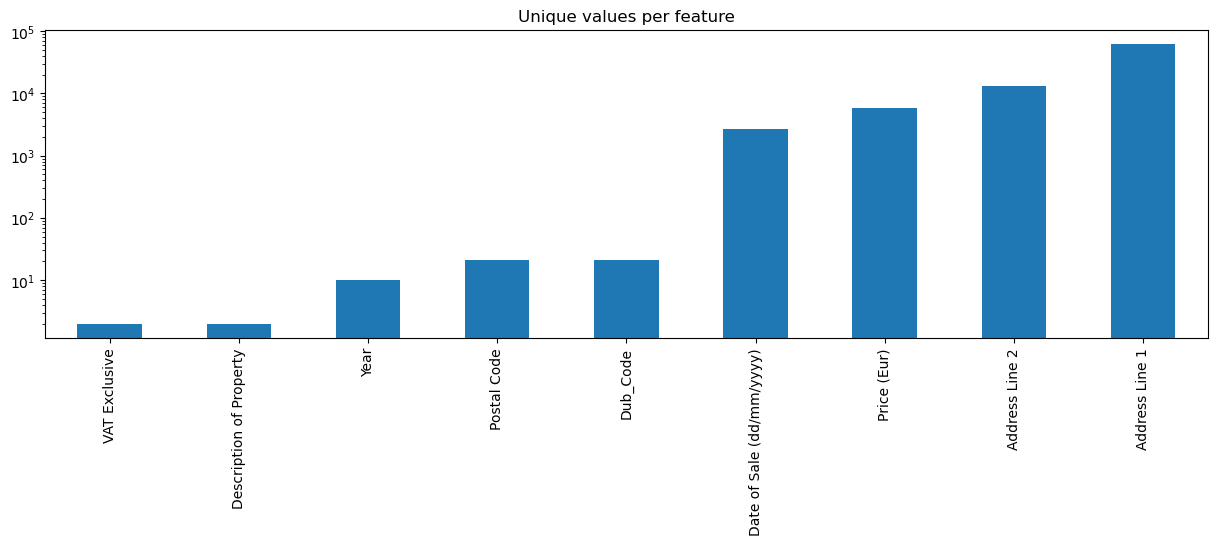

In [69]:
# For each numerical feature compute number of unique entries
unique_values = df1.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [70]:
df1.duplicated().sum()

70

In [71]:
df1.isna()

Date of Sale (dd/mm/yyyy)   Year  Address Line 1  Address Line 2  \
0                          False  False           False           False   
1                          False  False           False           False   
2                          False  False           False           False   
3                          False  False           False           False   
4                          False  False           False           False   
...                          ...    ...             ...             ...   
68636                      False  False           False           False   
68637                      False  False           False           False   
68638                      False  False           False           False   
68639                      False  False           False           False   
68640                      False  False           False           False   

       Postal Code  Dub_Code  Price (Eur)  VAT Exclusive  \
0            False     False        False          False   
1            False     False        False          False   
2            False     False        False          False   
3            False     False        False          False   
4            False     False        False          False   
...            ...       ...          ...            ...   
68636        False     False        False          False   
68637        False     False        False          False   
68638        False     False        False          False   
68639        False     False        False          False   
68640        False     False        False          False   

       Description of Property  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
68636                    False  
68637                    False  
68638                    False  
68639                    False  
68640                    False  

[68641 rows x 9 columns]

<AxesSubplot:>

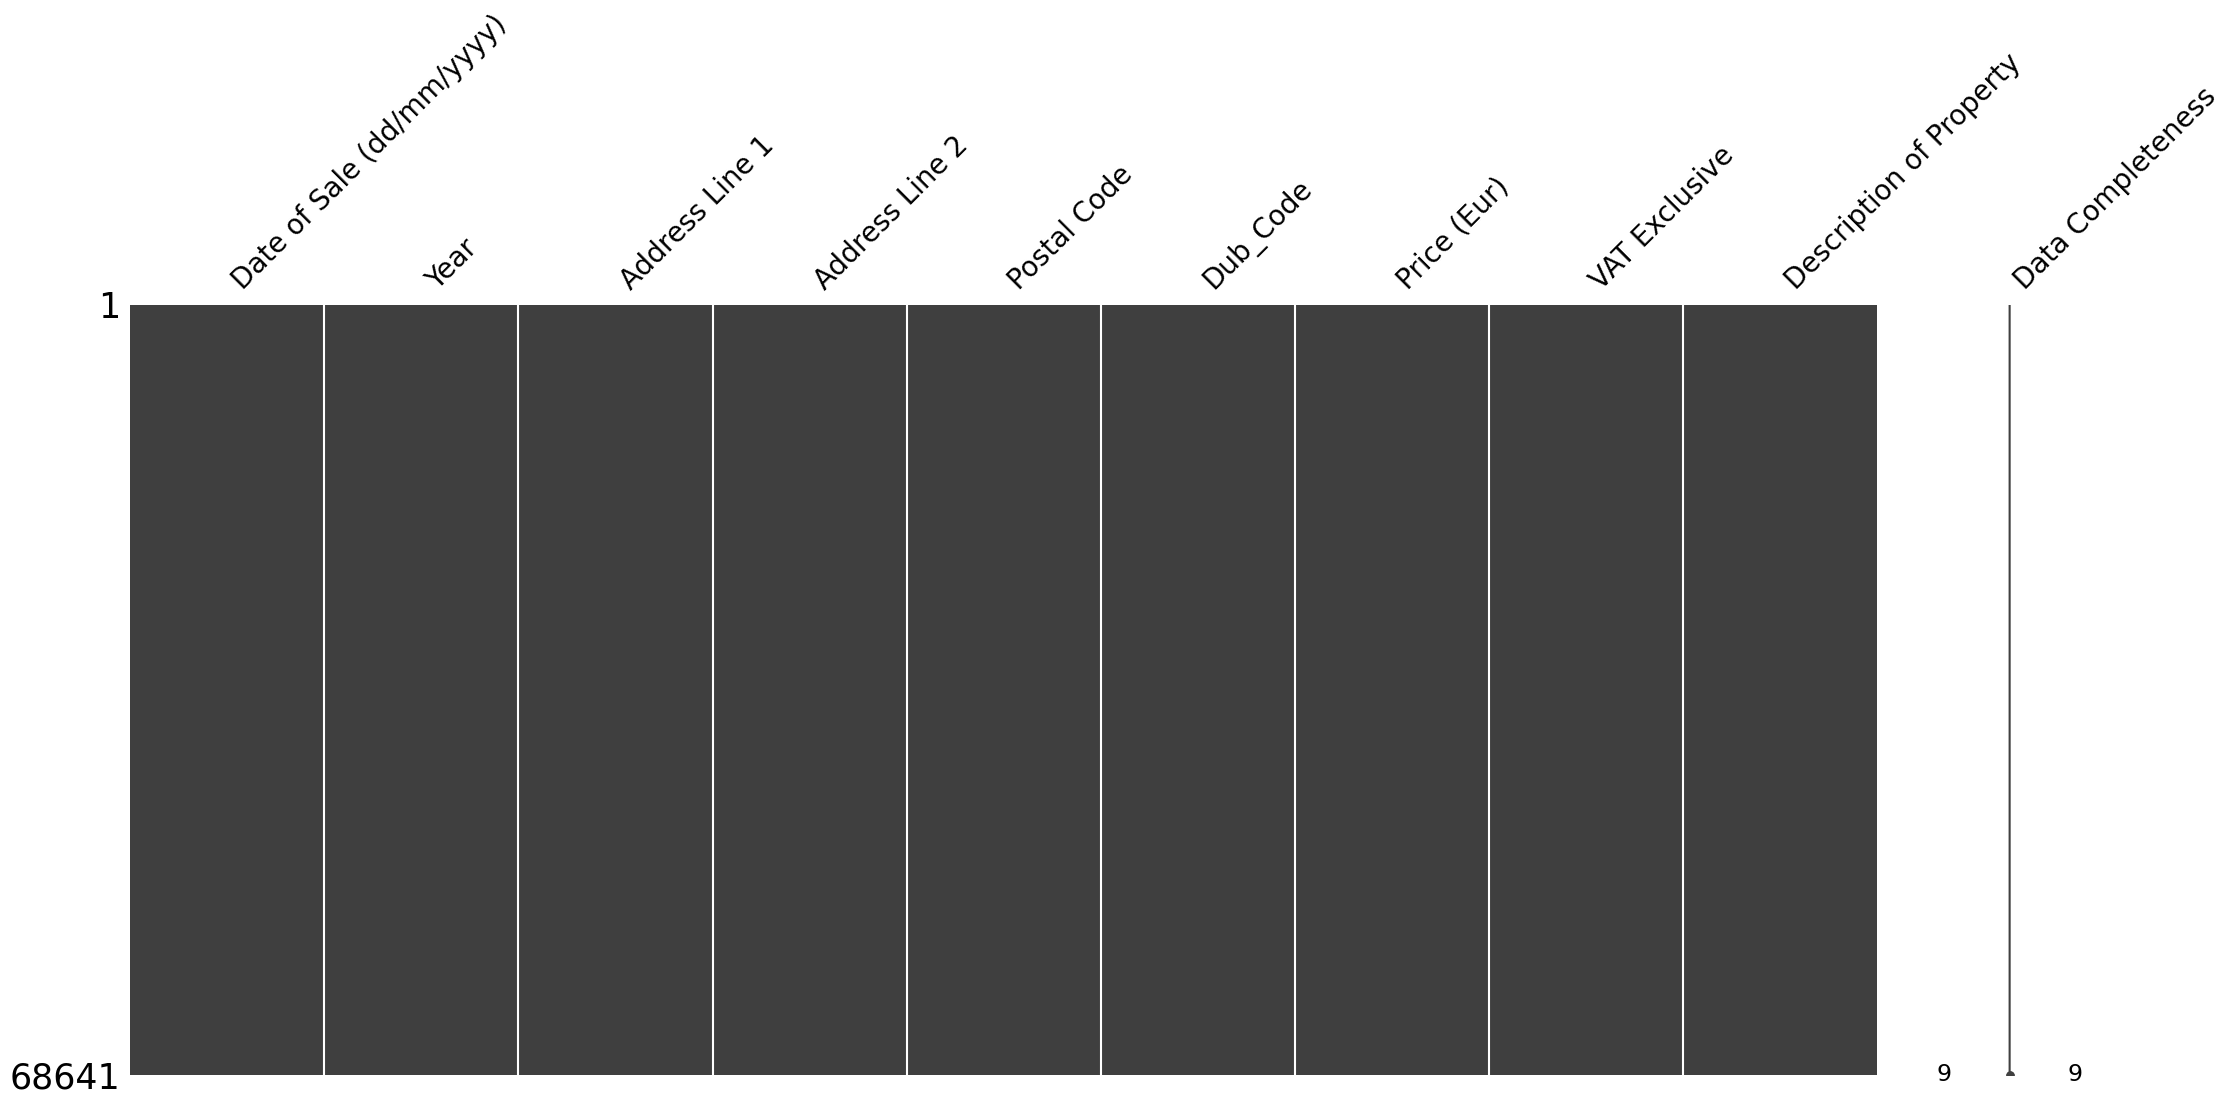

In [72]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(df1, labels=True, sort="descending", fontsize=20)

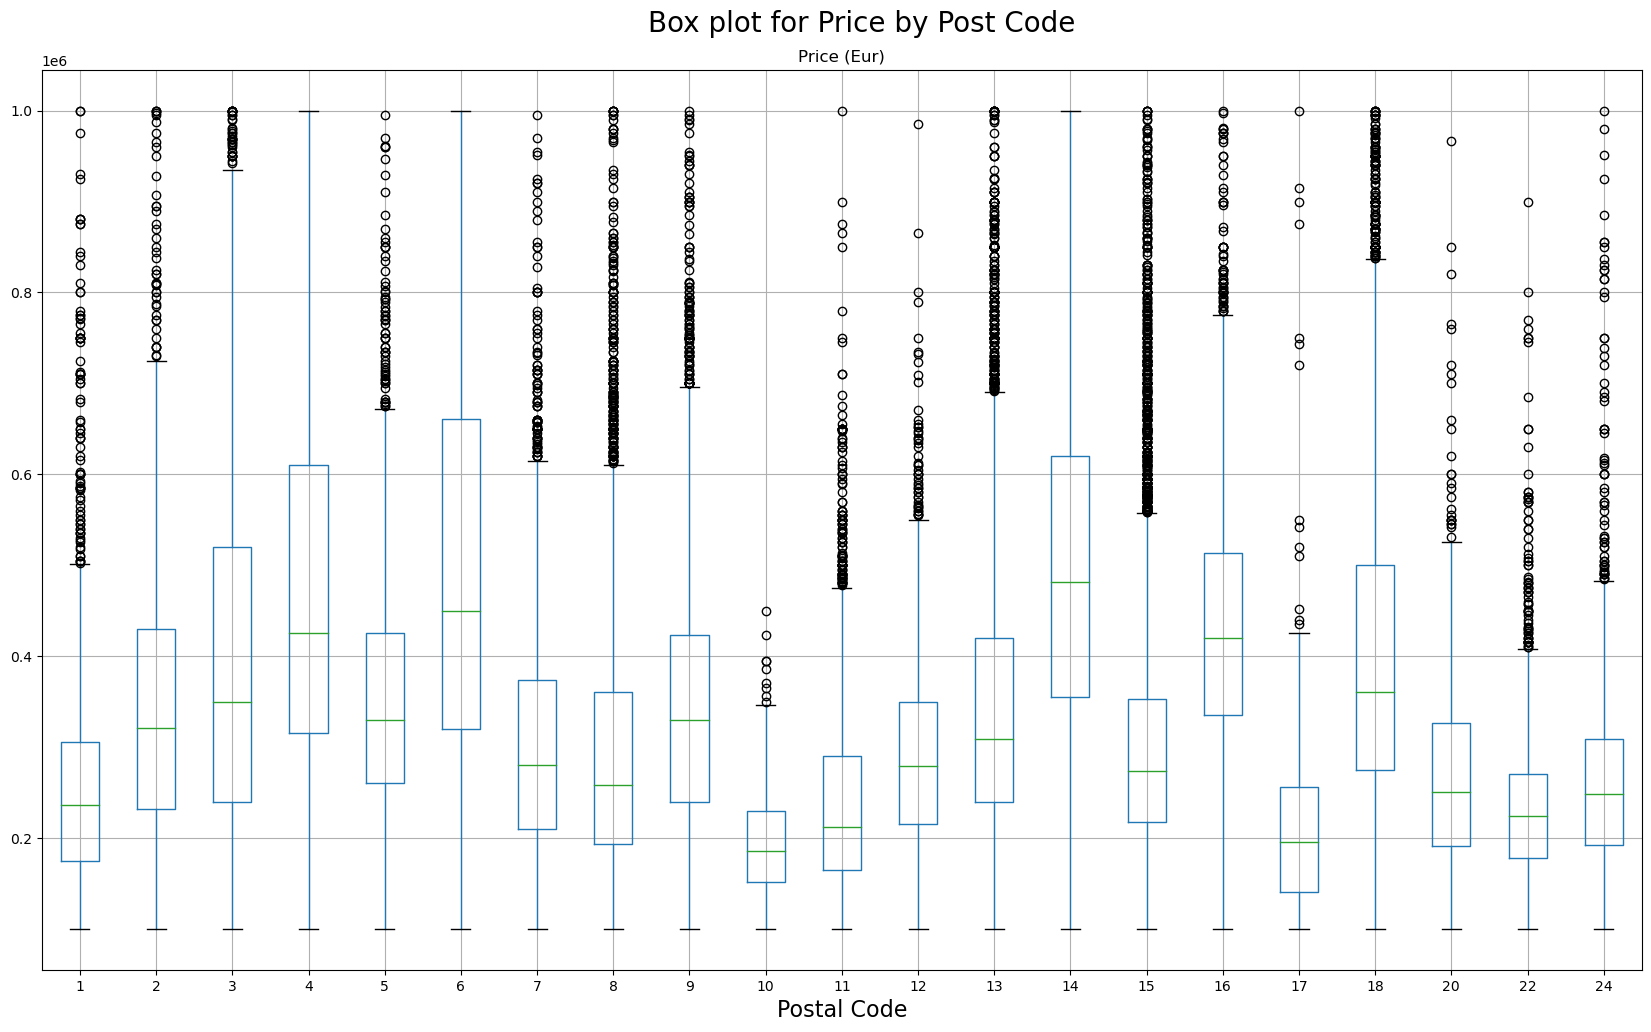

In [73]:
# Creates a boxplot to show an Element based on Item and Value
df1.boxplot(column =['Price (Eur)'], by = ['Dub_Code'], figsize =(20,12))

plt.suptitle("Box plot for Price by Post Code", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Postal Code", fontsize=16)

plt.show()

In [74]:
# Calculate the IQR of the 'Price (Eur)' column
q1 = df1['Price (Eur)'].quantile(0.25)
q3 = df1['Price (Eur)'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper limits for outliers
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Remove outliers from the 'Price (Eur)' column
df = df1[(df1['Price (Eur)'] >= lower_limit) & (data['Price (Eur)'] <= upper_limit)]

# Save the modified DataFrame to a new CSV file
df.to_csv('outliers_removed.csv', index=False)

df2 = pd.read_csv('outliers_removed.csv')
df2.head()

Date of Sale (dd/mm/yyyy)  Year                Address Line 1  \
0                2011-04-01  2011  Apartment 24 Baltrasna House   
1                2011-05-01  2011          13 Linenhall Terrace   
2                2011-05-01  2011              282 Clonard Road   
3                2011-05-01  2011            73 St Jarlath Road   
4                2011-06-01  2011             35 Trinity Square   

                   Address Line 2 Postal Code  Dub_Code  Price (Eur)  \
0   Spencer Dock, North Wall Quay    Dublin 1         1     290500.0   
1                      Broadstone    Dublin 7         7     290000.0   
2                         Crumlin   Dublin 12        12     170000.0   
3                           Cabra    Dublin 7         7     225000.0   
4                 Townsend Street    Dublin 2         2     180000.0   

  VAT Exclusive                Description of Property  
0            No  Second-Hand Dwelling house /Apartment  
1            No  Second-Hand Dwelling house /Apartment  
2            No  Second-Hand Dwelling house /Apartment  
3            No  Second-Hand Dwelling house /Apartment  
4            No  Second-Hand Dwelling house /Apartment

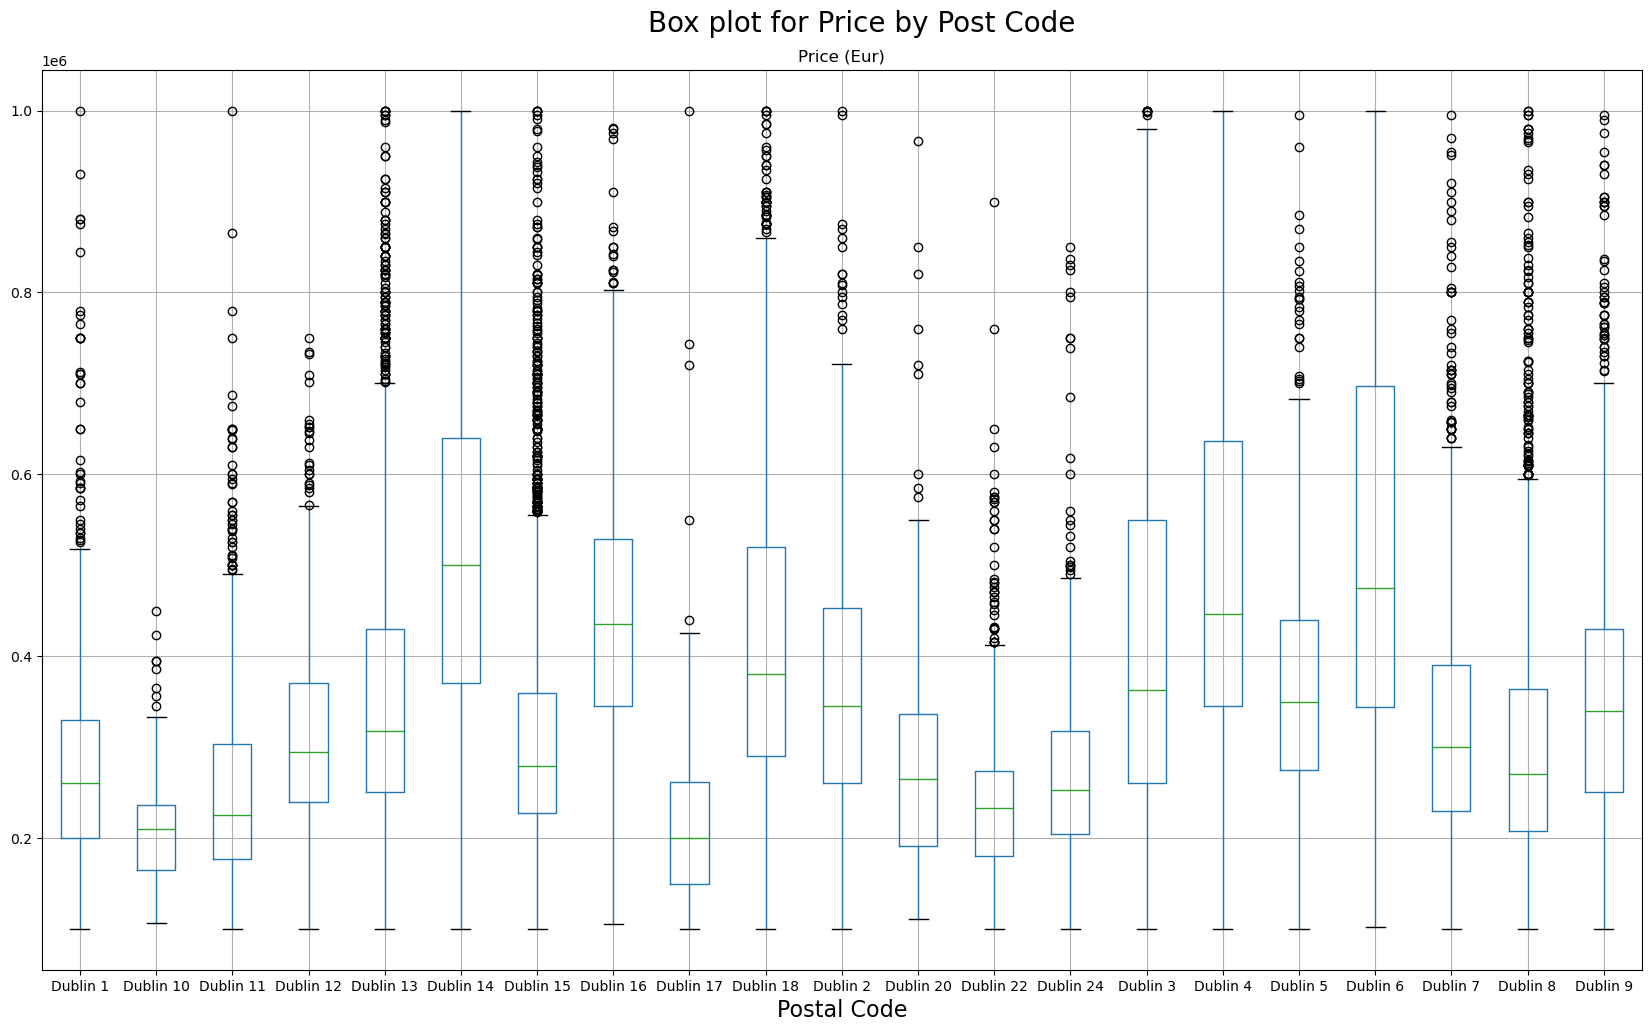

In [75]:
# Creates a boxplot to show an Element based on Item and Value
df2.boxplot(column =['Price (Eur)'], by = ['Postal Code'], figsize =(20,12))

plt.suptitle("Box plot for Price by Post Code", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Postal Code", fontsize=16)

plt.show()

In [76]:
# Here I group the data by Dublin post code and House Price then sort by the mean column to identify where most expensive on the list.
group_code2 = df2.groupby('Dub_Code')['Price (Eur)'].describe()

result_df2 = group_code2.sort_values('mean', ascending=False)

result_df2

count           mean            std        min       25%  \
Dub_Code                                                              
6         1203.0  516201.745761  226545.378148  101672.00  343700.0   
14        1511.0  513856.132614  183720.760582  100000.00  370000.0   
4         1530.0  496631.825078  207645.306494  100000.00  345000.0   
16        1571.0  443521.252527  134173.298638  105000.00  345000.0   
18        2267.0  420081.325082  172707.173237  100000.00  290000.0   
3         1411.0  415953.397760  206389.033232  100000.00  260000.0   
2          581.0  372392.047659  158511.471511  100000.00  260000.0   
5         1192.0  370668.344547  133172.026221  100000.00  275000.0   
13        1710.0  366456.504655  177007.389044  100000.00  250000.0   
9         1832.0  356663.954421  150646.699672  100000.00  250000.0   
7         1806.0  320704.965764  132081.775971  100000.00  230000.0   
15        3950.0  309187.111324  129582.963947  100000.00  227000.0   
12        1547.0  308162.341351  103171.678208  100000.00  240000.0   
8         1863.0  306105.855577  151714.776651  100000.00  207500.0   
20         405.0  279745.736123  113891.415527  111184.14  191000.0   
1         1030.0  278695.357388  120864.773051  100000.00  200000.0   
24        2449.0  262709.987227   87271.239240  100000.00  204000.0   
11        1482.0  252660.895256  108059.090790  100000.00  177000.0   
22        1017.0  240881.015900   87058.660347  100000.00  180384.0   
17         320.0  219719.874969   96515.866803  100000.00  149250.0   
10         330.0  206857.385909   53572.935960  106000.00  165000.0   

                50%         75%        max  
Dub_Code                                    
6         475000.00  697500.000  1000000.0  
14        500000.00  640000.000  1000000.0  
4         446500.00  636500.000  1000000.0  
16        435000.00  529074.705   981113.0  
18        380000.00  519823.395  1000000.0  
3         362500.00  550000.000  1000000.0  
2         345000.00  452361.000  1000000.0  
5         350000.00  440000.000   995000.0  
13        317180.81  430000.000  1000000.0  
9         340000.00  430250.000   995000.0  
7         300000.00  390000.000   995000.0  
15        279000.00  359743.750  1000000.0  
12        295000.00  370000.000   750000.0  
8         270000.00  363750.000  1000000.0  
20        265000.00  336000.000   967000.0  
1         260000.00  330000.000  1000000.0  
24        252500.00  317100.000   850000.0  
11        225000.00  303000.000  1000000.0  
22        232500.00  273127.750   900000.0  
17        200000.00  261250.000  1000000.0  
10        210000.00  235750.000   450000.0

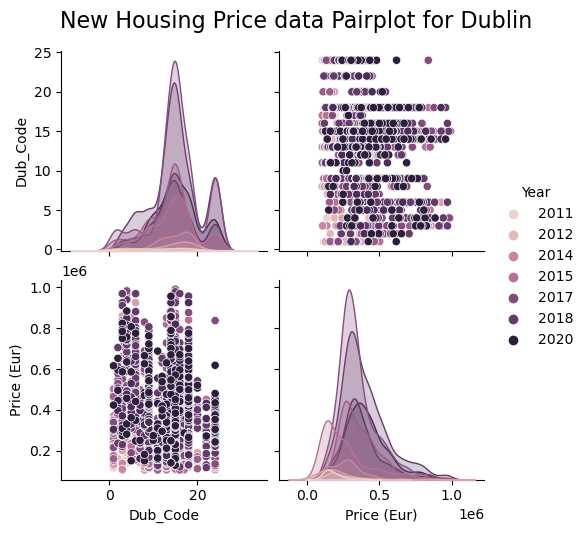

In [77]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_ptrans = sns.pairplot(df2.loc[df2['Description of Property'] == 'New Dwelling house /Apartment'], hue='Year')

plt.suptitle("New Housing Price data Pairplot for Dublin", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

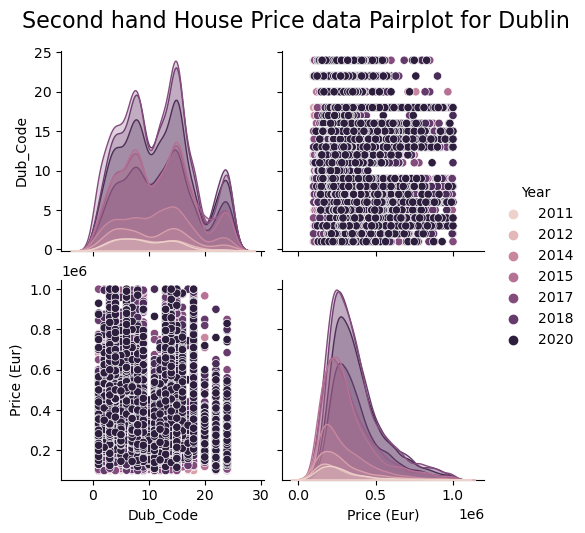

In [78]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_ptrans = sns.pairplot(df2.loc[df2['Description of Property'] == 'Second-Hand Dwelling house /Apartment'], hue='Year')

plt.suptitle("Second hand House Price data Pairplot for Dublin", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

array([[<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>]], dtype=object)

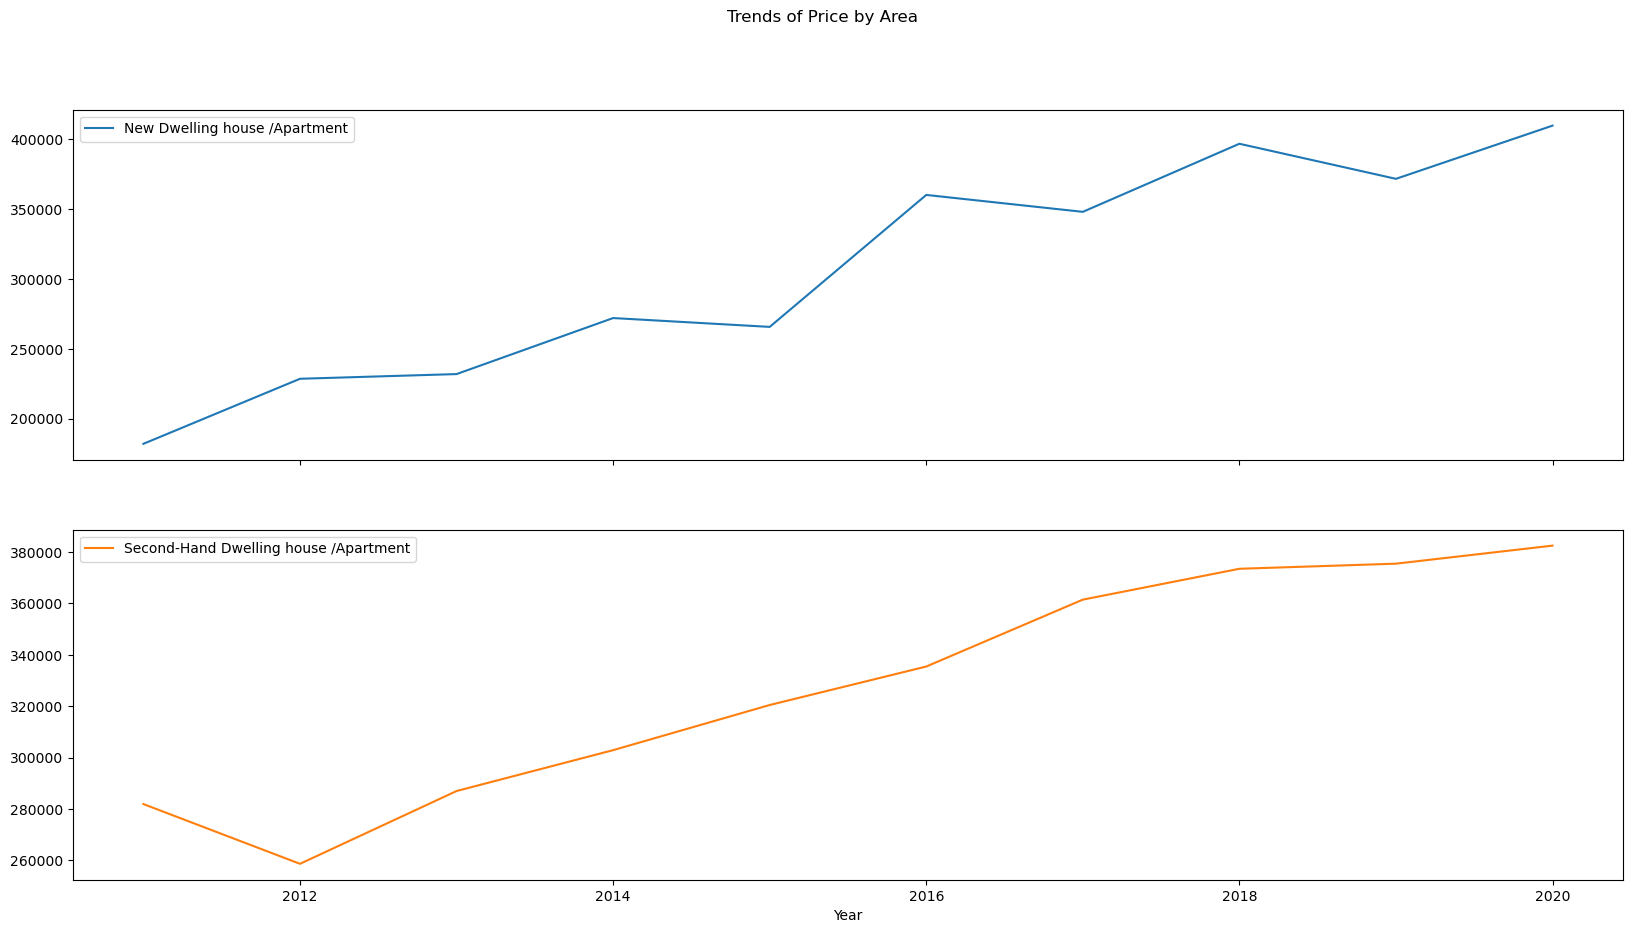

In [79]:
pd.pivot_table(df2.reset_index(),
               index='Year', columns='Description of Property', values='Price (Eur)'
              ).plot(subplots=True, layout=(2,1), figsize =(20,10), title=('Trends of Price by Area'))

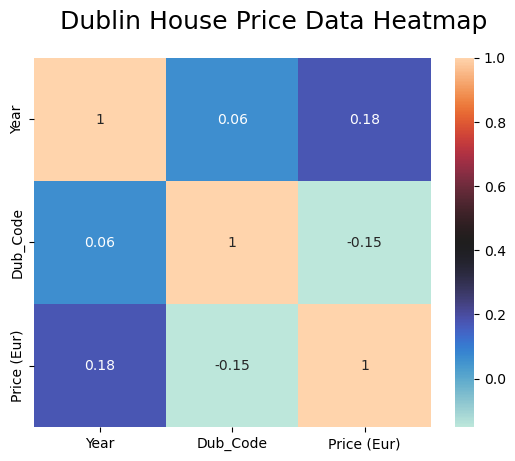

In [80]:
corelation = df2.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap="icefire")

plt.suptitle("Dublin House Price Data Heatmap", fontsize=18, color="Black")

plt.show()

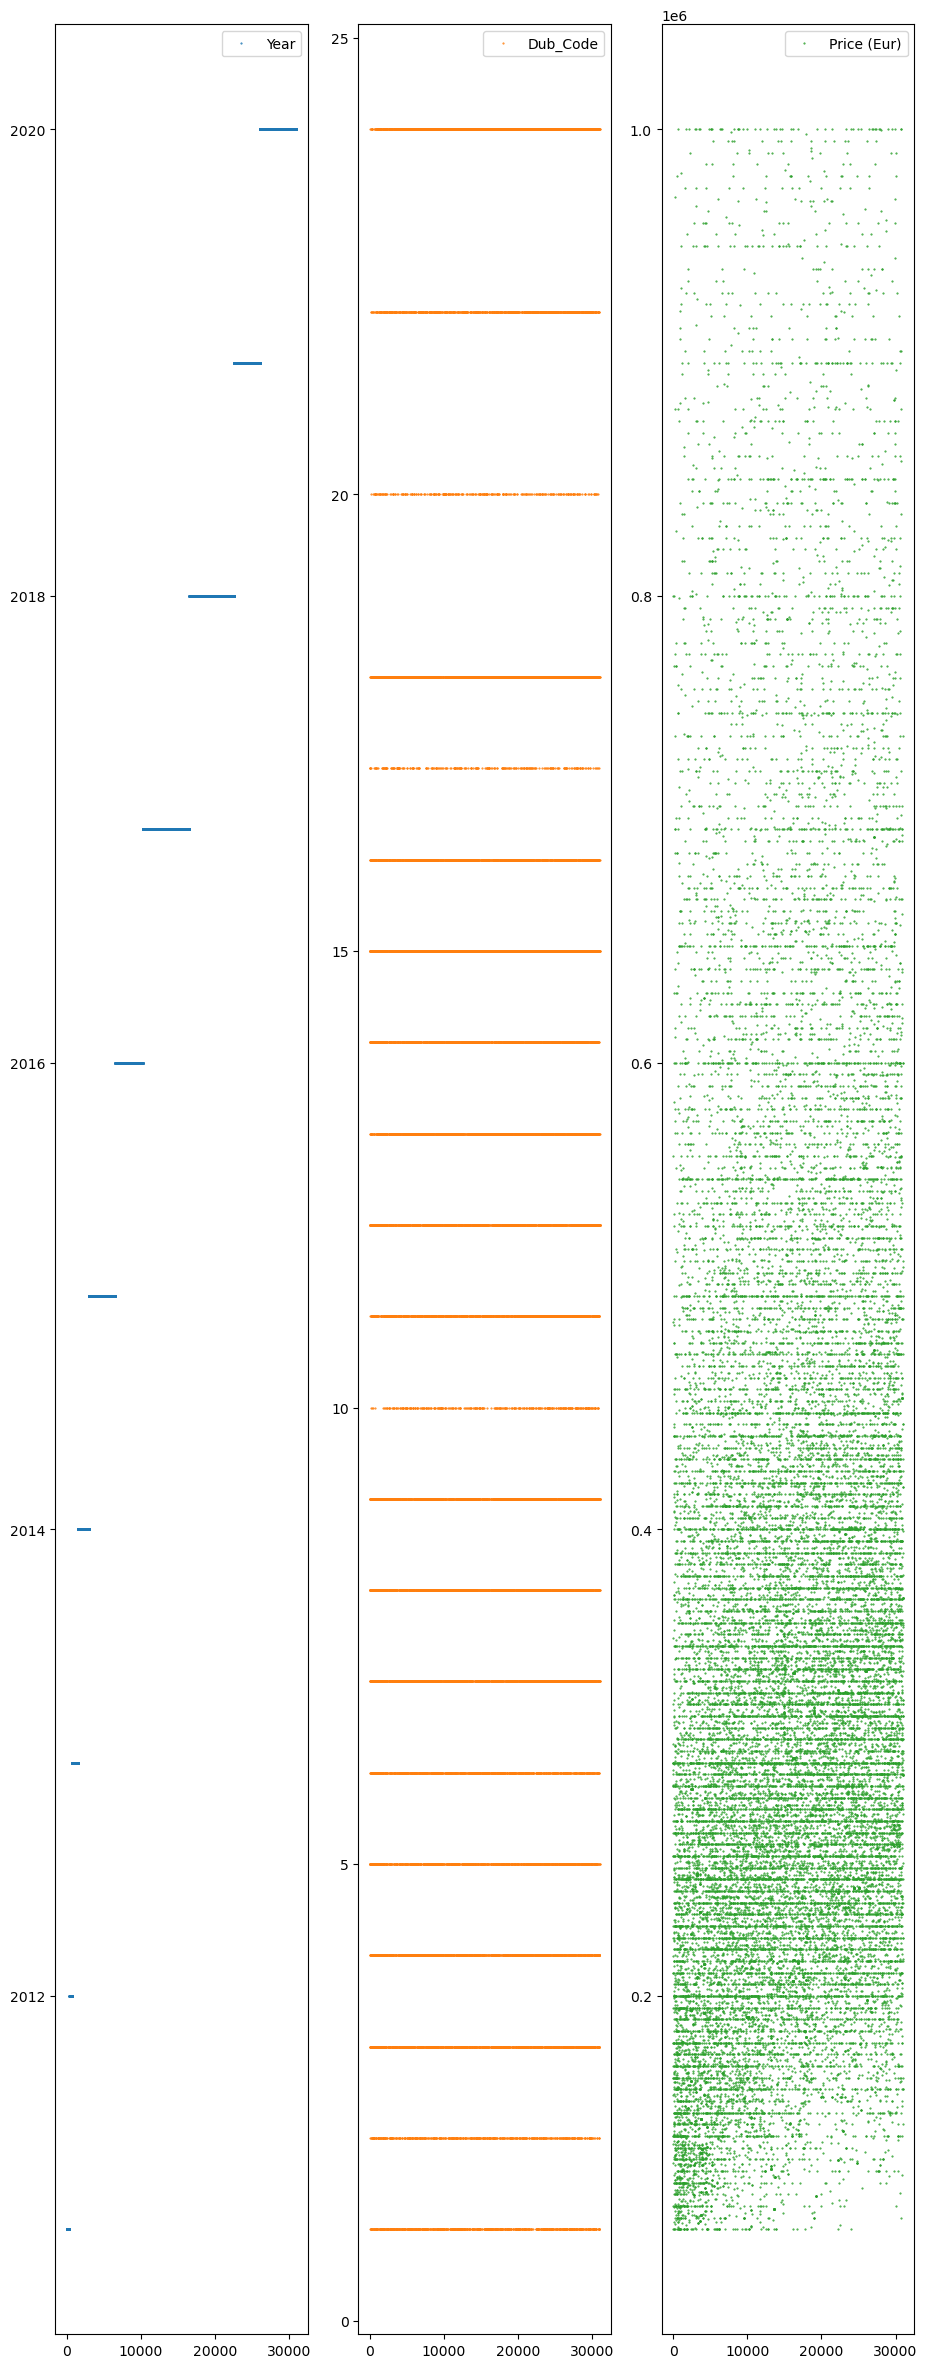

In [81]:
# Displays a global view of the dataset for only numerical features
df2.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

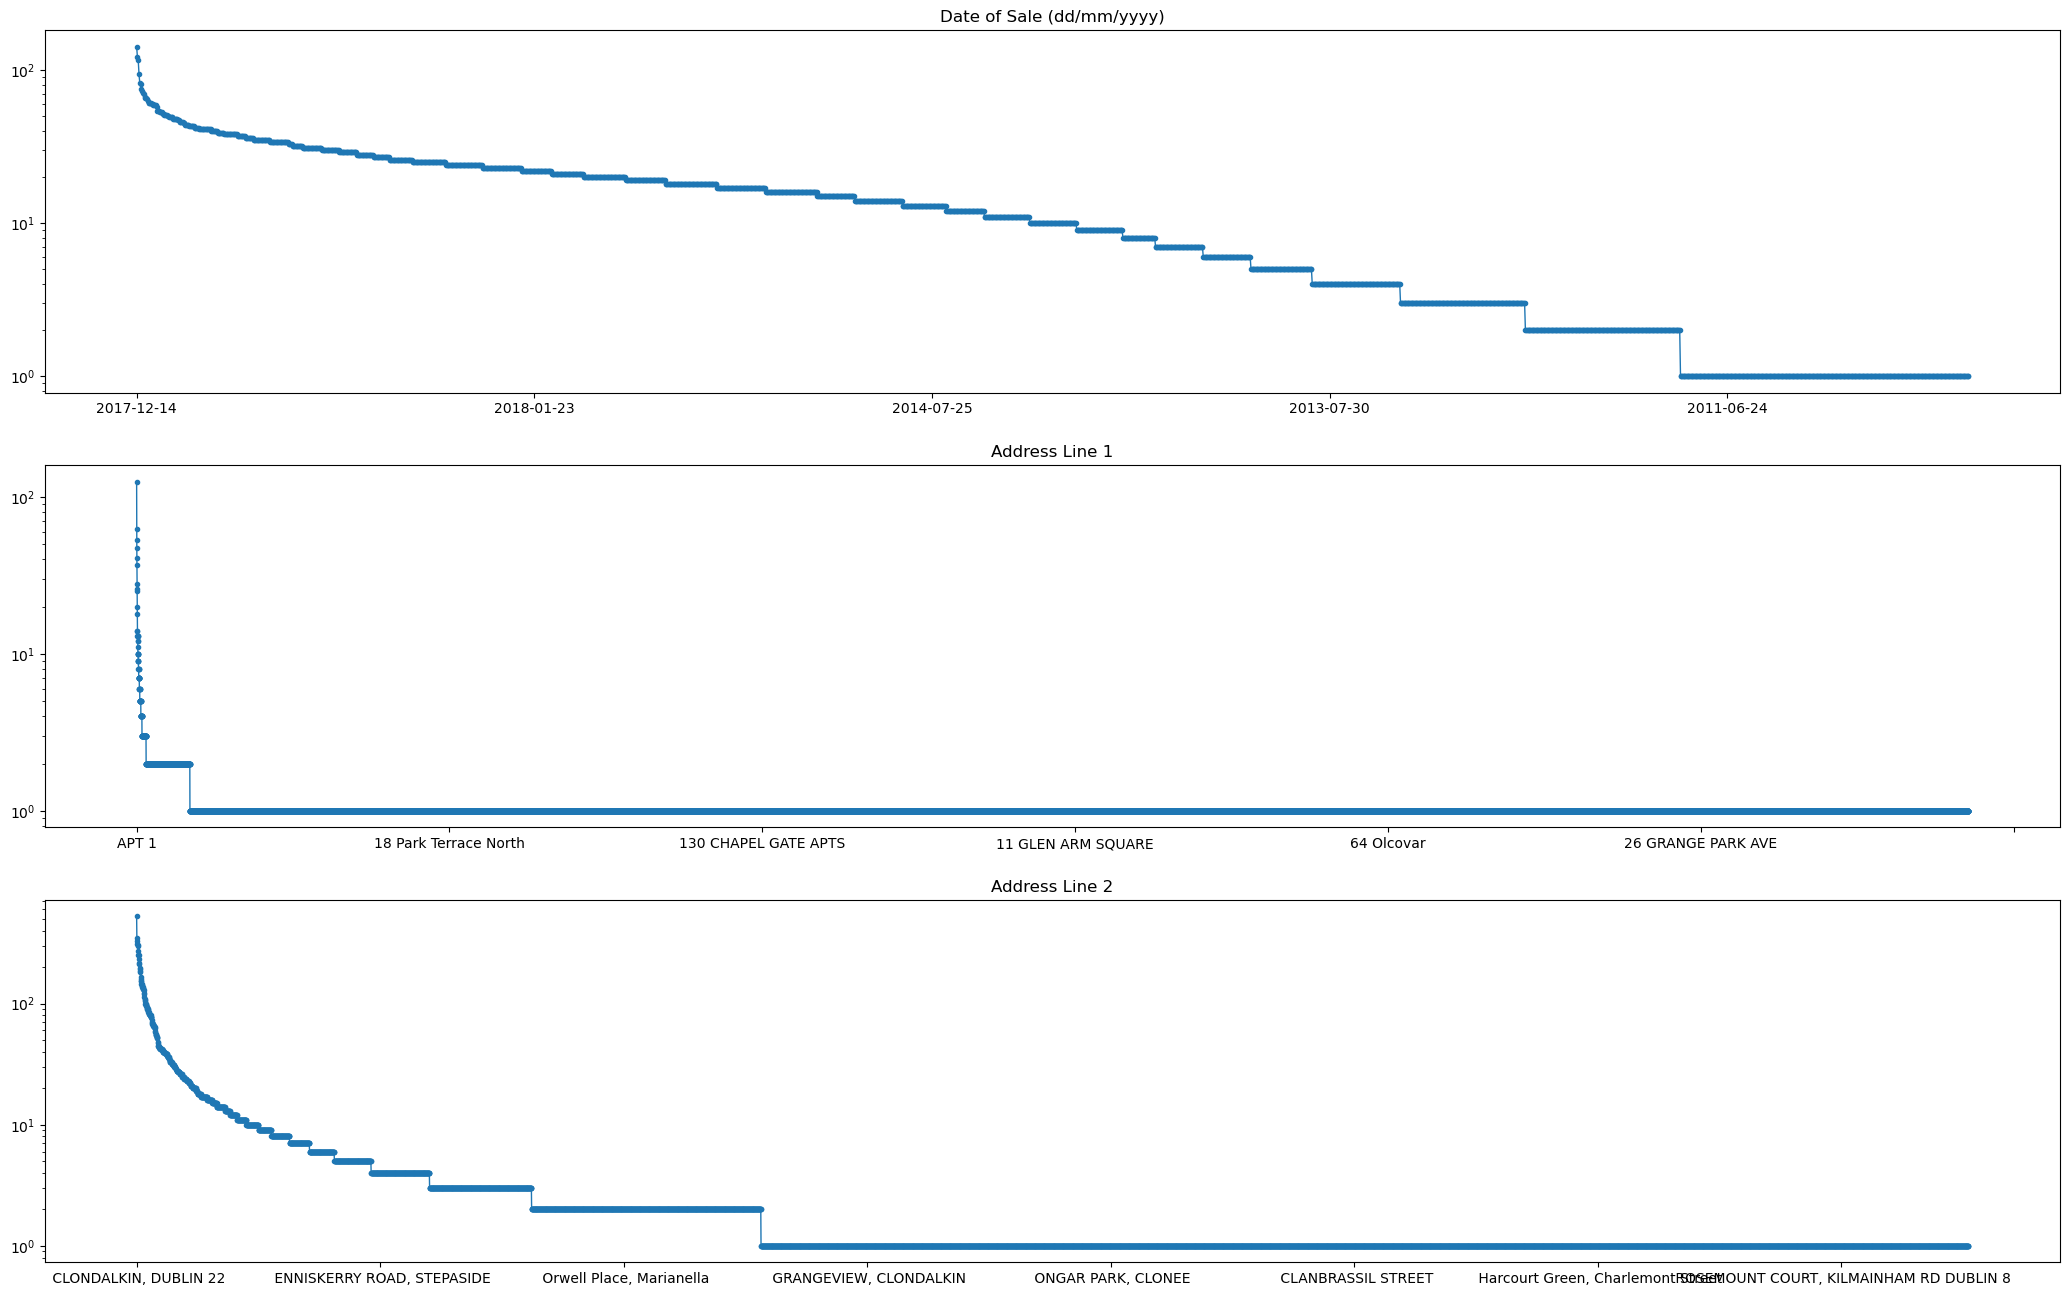

In [82]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(26, 16))

# Identify non-numerical features
df_non_numerical = df2.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

Skewness: 1.2608242226001254
Kurtosis: 2.964501995154232


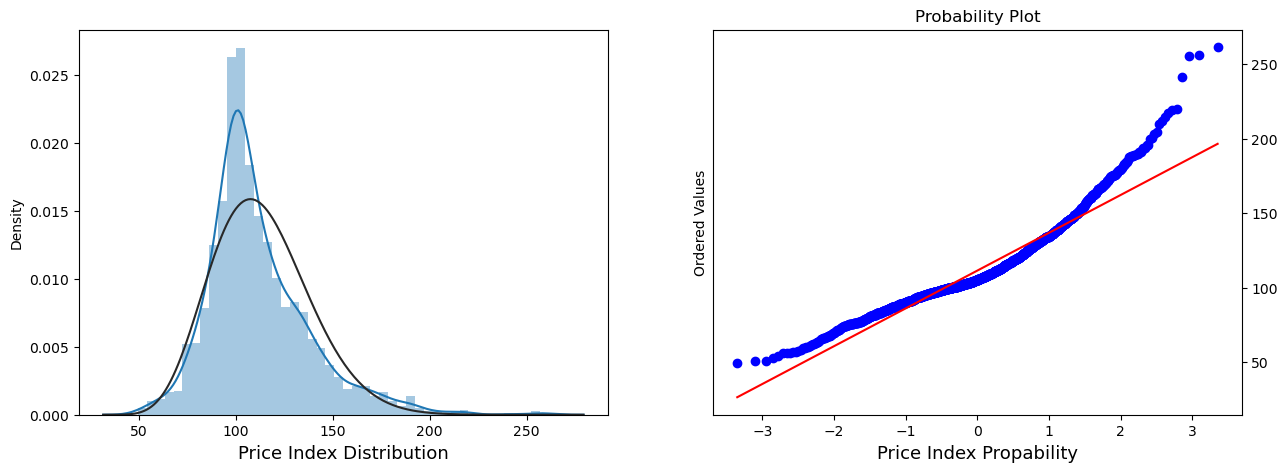

In [83]:
# Plot histogram & Probability plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(pi.Price_Index, fit=stats.gausshyper, ax=ax[0])
stats.probplot(pi.Price_Index, plot=plt)
ax[0].set_xlabel('Price Index Distribution', fontsize = 13)
ax[1].set_xlabel('Price Index Propability', fontsize = 13)
ax[1].yaxis.tick_right() # where the y axis marks will be

# Calculate skewness and kurtosis
skewness = stats.skew(pi['Price_Index'])
kurtosis = stats.kurtosis(pi['Price_Index'])

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

In [84]:
# calculate variance and standard deviation
variance = np.var(pi['Price_Index'])
std_deviation = np.std(pi['Price_Index'])

print("Variance:", variance)
print("Standard deviation:", std_deviation)

Variance: 695.6917932146929
Standard deviation: 26.37596999571187


Skewness: 1.2762276870197165
Kurtosis: 1.6184770676930196


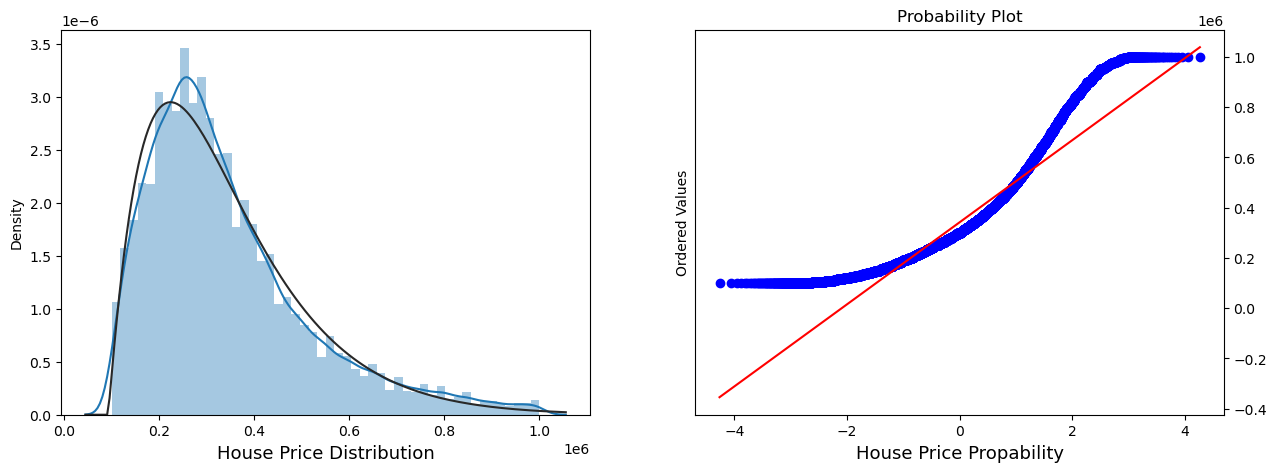

In [85]:
# Plot histogram , density plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df1['Price (Eur)'], fit=stats.gausshyper, ax=ax[0])
stats.probplot(df1['Price (Eur)'], plot=plt)
ax[0].set_xlabel('House Price Distribution', fontsize = 13)
ax[1].set_xlabel('House Price Propability', fontsize = 13)
ax[1].yaxis.tick_right() # where the y axis marks will be

# Calculate skewness and kurtosis
skewness = stats.skew(df1['Price (Eur)'])
kurtosis = stats.kurtosis(df1['Price (Eur)'])

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

In [86]:
# calculate variance and standard deviation
variance = np.var(df1['Price (Eur)'])
std_deviation = np.std(df1['Price (Eur)'])

print("Variance:", variance)
print("Standard deviation:", std_deviation)

Variance: 29617179718.200935
Standard deviation: 172096.4256403977


# Descriptive Assessment complete, time to do some Infer'in

## Confidence Interval & T - Test

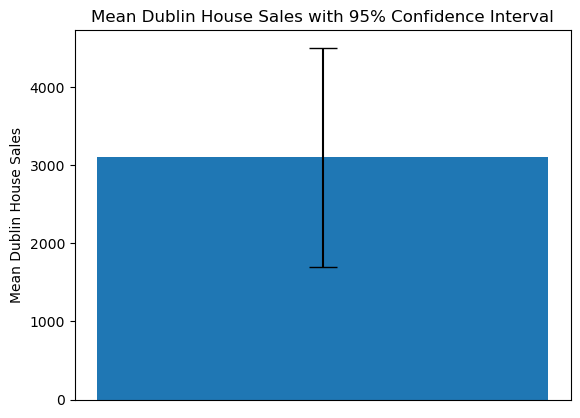

Mean house sales: 3100.70
Standard deviation of house sales: 2259.83
T-statistic: 0.14
P-value: 0.89
95% Confidence interval: (1700.04, 4501.36)


In [87]:
# Compute the number of house sales for each year
house_sales = df2.groupby('Year')['Address Line 1'].count()

# Calculate the mean and standard deviation of house sales
mean_sales = house_sales.mean()
std_sales = house_sales.std(ddof=1)

# Set the null hypothesis as the population mean being equal to 5000
null_hypothesis = 3000

# Perform a two-sided t-test
t_statistic, p_value = ttest_1samp(house_sales, null_hypothesis)

# Calculate the confidence interval
confidence_interval = (mean_sales - 1.96 * std_sales / len(house_sales)**0.5,
                       mean_sales + 1.96 * std_sales / len(house_sales)**0.5)

ci_lower = mean_sales - 1.96 * std_sales / len(house_sales)**0.5
ci_upper = mean_sales + 1.96 * std_sales / len(house_sales)**0.5

plt.bar(x=[0], height=[mean_sales], yerr=[[mean_sales - ci_lower], [ci_upper - mean_sales]], capsize=10)
plt.xticks([])
plt.title('Mean Dublin House Sales with 95% Confidence Interval')
plt.ylabel('Mean Dublin House Sales')
plt.show()

# Print the results
print("Mean house sales: {:.2f}".format(mean_sales))
print("Standard deviation of house sales: {:.2f}".format(std_sales))
print("T-statistic: {:.2f}".format(t_statistic))
print("P-value: {:.2f}".format(p_value))
print("95% Confidence interval: ({:.2f}, {:.2f})".format(confidence_interval[0], confidence_interval[1]))

In [88]:
# define the two groups of data
group_1 = df2.loc[df2['Description of Property'] == 'Second-Hand Dwelling house /Apartment', 'Year']
group_2 = df2.loc[df2['Description of Property'] == 'New Dwelling house /Apartment', 'Year']


# perform the t-test
t_statistic, p_value = ttest_ind(group_1, group_2)

# print the t-statistic and p-value
print(t_statistic)
print(p_value)

# Determine if the differences between the groups are significant
if p_value < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")

-5.454057810920085
4.9608953978272476e-08
There is a significant difference between the means of the groups.


### Shapiro Wilks Test

In [89]:
# Checking the null Hypothesis that my EU House Price Index data is normally Distributed
stat, p = shapiro(pi['Price_Index'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.923, p=0.000
Sample does not look Gaussian (reject H0)


In [90]:
# Checking the null Hypothesis that my Dublin House Price data is normally Distributed
stat, p = shapiro(df2['Price (Eur)'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.905, p=0.000
Sample does not look Gaussian (reject H0)


### ANOVA - Analysis of variance

### Comparing EU data by Year - First test is All EU without Ireland and Second Test is Ireland Only

In [91]:
data3 = pi.loc[pi['Geo'] != 'IE']
factor = 'Year'

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Price_Index'] for name, group in pi.groupby(factor)])

# Print the results
print(f"Factor: {factor}")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

Factor: Year
F-statistic: 138.11907215489168
P-value: 4.06929570427762e-305


In [92]:
data4 = pi.loc[pi['Geo'] == 'IE']
factor = 'Year'

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Price_Index'] for name, group in data4.groupby(factor)])

# Print the results
print(f"Factor: {factor}")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

Factor: Year
F-statistic: 122.46140362272793
P-value: 7.117707276120295e-37


In [93]:
data3 = pi['Year']

# Add some data for two groups
group1 = data3.loc[pi['Geo'] != 'IE']
group2 = data3.loc[pi['Geo'] == 'IE']

# Perform the ANOVA test
statistic, pvalue = f_oneway(group1, group2)

# Print the results
print("F-value:", statistic)
print("P-value:", pvalue)

# Determine if the differences between the groups are significant
if pvalue < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")

F-value: 1.25104780221836
P-value: 0.2635087248530223
There is no significant difference between the means of the groups.


### Regression Analysis & Pearson Correlation Co-Efficient

Slope: 3.2400
Intercept: -6414.2723
Correlation coefficient (r): 0.6037
P-value: 0.0000
Standard error: 0.1032


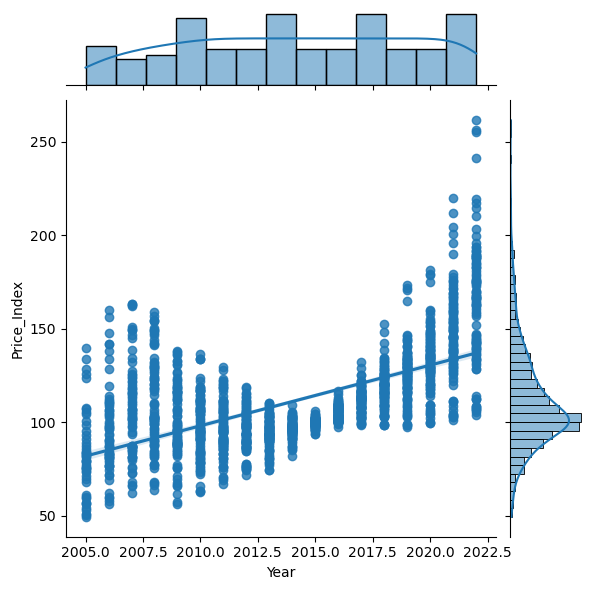

In [94]:
# Bivariate Distribution plot showing the Regression Analysis for EU Data
sns.jointplot(x = "Year", y = "Price_Index", data = pi, kind = "reg");

# Regression Analysis calcuations
slope, intercept, r_value, p_value, std_err = stats.linregress(pi['Year'], pi['Price_Index'])

# Print the regression analysis results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Slope: 14755.4601
Intercept: -29410138.3926
Correlation coefficient (r): 0.1767
P-value: 0.0000
Standard error: 466.8038


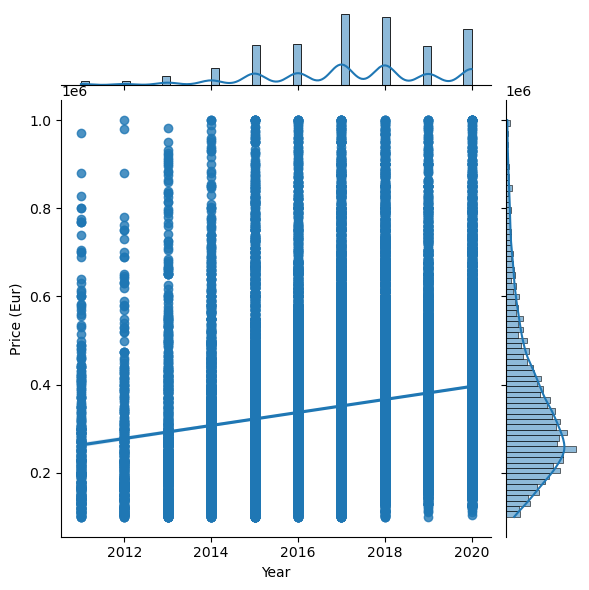

In [95]:
# Bivariate Distribution plot showing the Regression Analysis for Dublin House Data
sns.jointplot(x = "Year", y = "Price (Eur)", data = df2, kind = "reg")

# Regression Analysis calcuations
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['Year'], df2['Price (Eur)'])

# Print the regression analysis results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

### Chi-Squared Test

In [96]:
# Create a contingency table with the counts of Price Index vs Country based on the EU Data
contingency_table2 = pd.crosstab(pi['Price_Index'], columns=pi['Geo'])

# Run the chi-squared test on the contingency table
chi2, pval, dof, expected = chi2_contingency(contingency_table2)

# Print the results
print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {pval:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 38462.8429
P-value: 0.0208
Degrees of freedom: 37900
Expected frequencies:
[[0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 ...
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]]


In [97]:
# Create a contingency table with the counts of House Price vs Post code in Dublin
contingency_table1 = pd.crosstab(df1['Price (Eur)'], columns=df1['Postal Code'])

# Run the chi-squared test on the contingency table
chi2, pval, dof, expected = chi2_contingency(contingency_table1)

# Print the results
print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {pval:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 208204.5440
P-value: 0.0000
Degrees of freedom: 117480
Expected frequencies:
[[7.93592751e+00 2.46157544e+00 1.15615303e+01 ... 1.36910156e+01
  1.40847307e+01 1.39101266e+01]
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 ...
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 [3.03929139e+00 9.42731021e-01 4.42782011e+00 ... 5.24336767e+00
  5.39415218e+00 5.32728253e+00]]


# Machine Learning Aspect

# ARIMA - Autoregressive Integrated Moving Average

In [98]:
len(pi.index)

1721

In [99]:
pi.head()

Geo  Price_Index  Year Quarter
0  AT        74.05  2010      Q1
1  AT        76.54  2010      Q2
2  AT        78.16  2010      Q3
3  AT        78.44  2010      Q4
4  AT        79.01  2011      Q1

In [100]:
# filter only area and price
df3 = pi.loc[:, ['Price_Index']]
df3.head()

Price_Index
0        74.05
1        76.54
2        78.16
3        78.44
4        79.01

<AxesSubplot:>

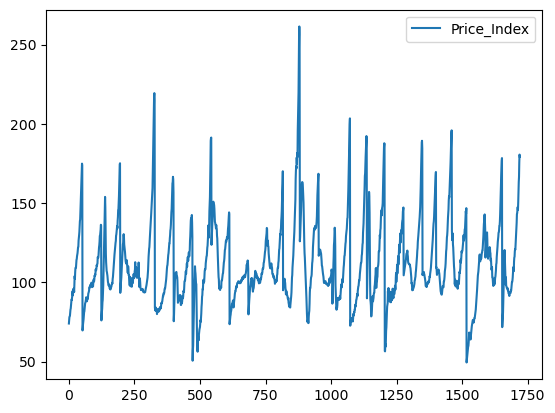

In [101]:
df3.plot()

<AxesSubplot:>

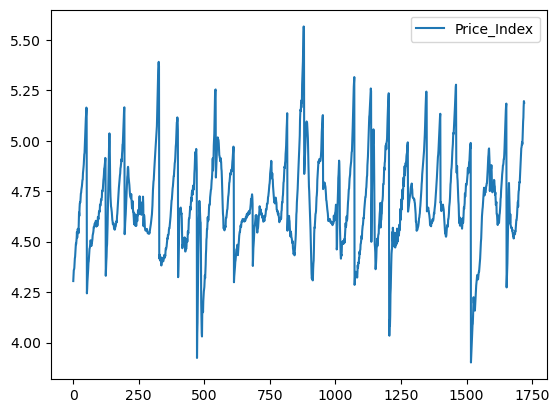

In [102]:
df4 = np.log(df3) # transforming the data to reduce noise and trying to stabilize its variance

df4.plot()

In [103]:
# Spliting my data and keeping 10% of the rows for the test group 
msk = (df4.index < len(df4)-175)
df4_train = df4[msk].copy()
df4_test = df4[~msk].copy()

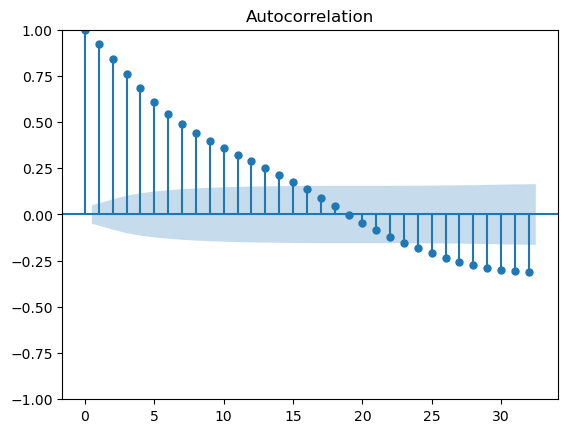

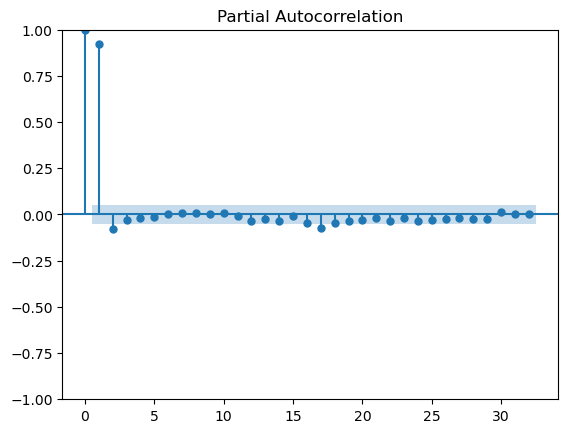

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# autocorrelation function is the correlation of the time series with its lags
# partial autocorrelation function) is the same but only shows the partial correlation after removing the effects of lower-order-lags

acf_original = plot_acf(df4_train)

pacf_original = plot_pacf(df4_train)

In [105]:
# Here I am testing the Augmented Dickey-Fuller test for the null hypothesis that there is a unit root
# The large p-value means the test fails to reject the null hypothesis suggesting the time series is non-stationary

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df4_train)
print(f'p-value: {adf_test[1]}')

p-value: 4.949020339675285e-13


<AxesSubplot:>

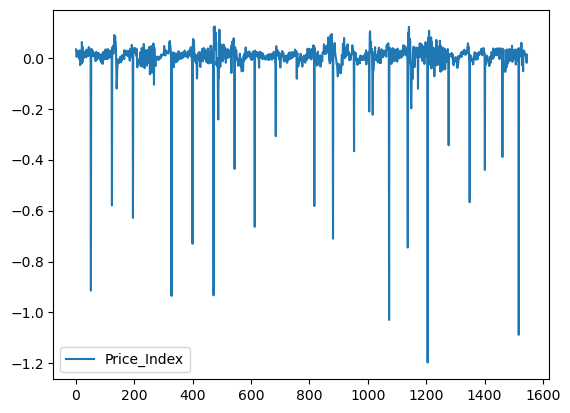

In [106]:
# Using differencing to series stationary, one observation minus the previous observation to get a new series. 
# I dropped the first observation as its doesnt have previous observation to subtract
df4_train_diff = df4_train.diff().dropna()
df4_train_diff.plot()

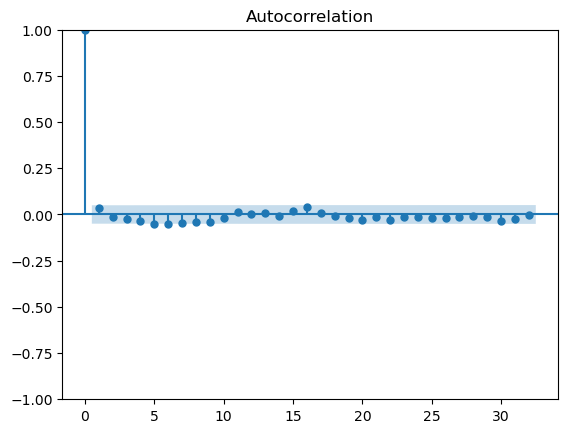

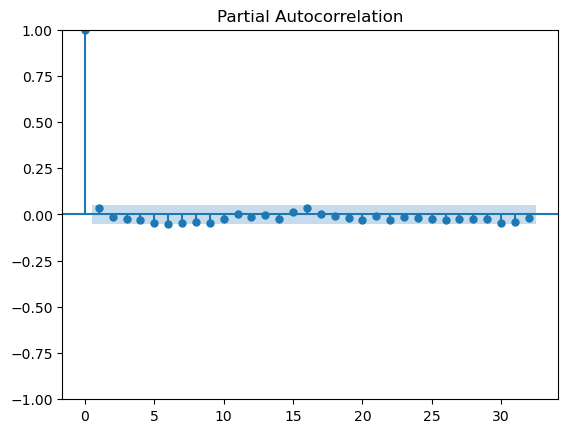

In [107]:
# ACF and PACF plots of the first difference time series, first difference time series doesn’t show a strong trend anymore
acf_diff = plot_acf(df4_train_diff)

pacf_diff = plot_pacf(df4_train_diff)

In [108]:
# Re-running the ADF test - The p-value still rejects the null hypothesis at a 5% significance level.
# I can conclude the first difference time series is most likely stationary
# My d paramter is '1'

adf_test = adfuller(df4_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.1132531462695282e-28


In [109]:
# As both my ACF & PACF has a spike at lag p but not beyond I now know my 'p' parameter is '1' and my 'q' parameter is '0'

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df4_train, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Price_Index   No. Observations:                 1546
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1561.217
Date:                Fri, 05 May 2023   AIC                          -3118.433
Time:                        13:16:56   BIC                          -3107.748
Sample:                             0   HQIC                         -3114.458
                               - 1546                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0372      0.030      1.246      0.213      -0.021       0.096
sigma2         0.0078   4.17e-05    185.994      0.000       0.008       0.008
Ljung-Box (L1) (Q):                   0.00   Jarque-

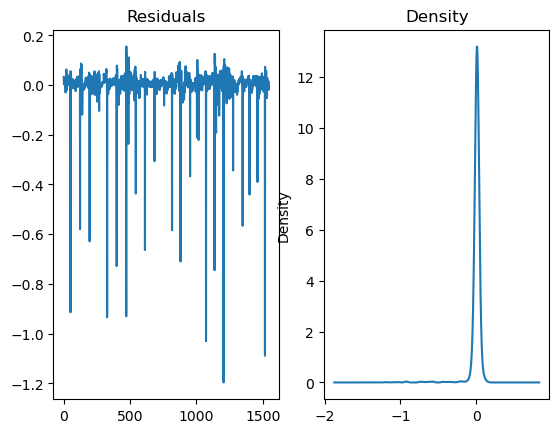

In [110]:
# Here I am checking that the residuals look random, and their density looks normally distributed -  mean of 0.

residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

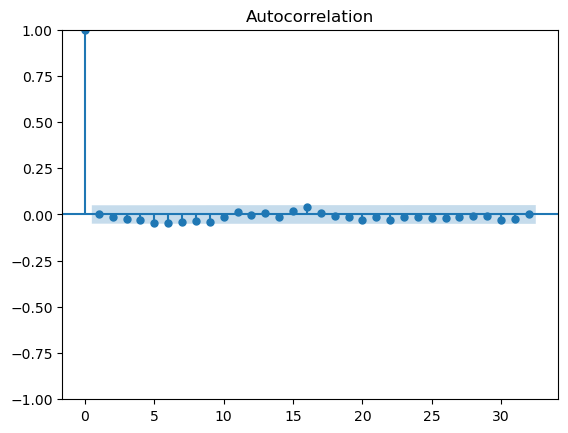

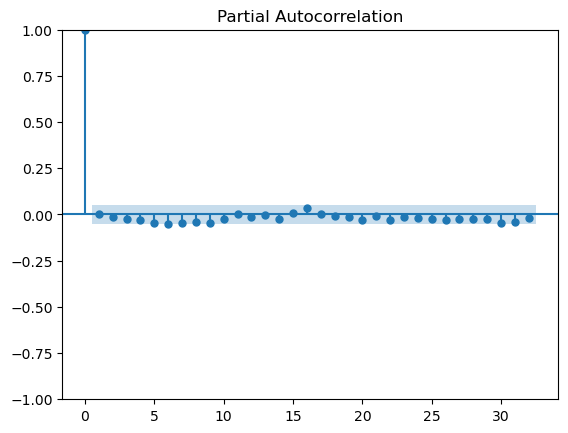

In [111]:
# Checking the ACF and PACF plots for the residuals, showing no spikes
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<AxesSubplot:>

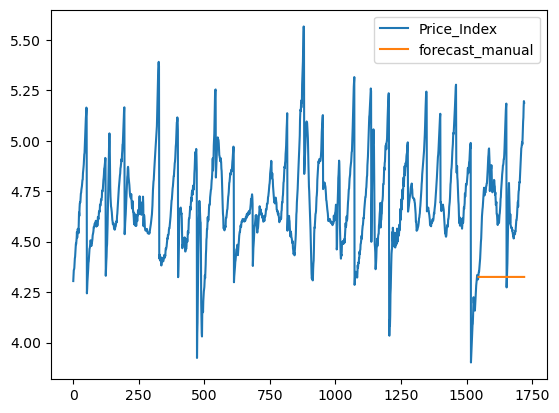

In [112]:
# Here I am calculating my predictions and plotting them with the series
forecast_test = model_fit.forecast(int(len(df4_test)))

df4['forecast_manual'] = [None]*int(len(df4_train)) + list(forecast_test)

df4.plot()

In [113]:
forecast_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 175 entries, 1546 to 1720
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
175 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [114]:
# Here I am using the Automatic ARIMA model function to give me the optiomal model based on the criteria.
# As my model didnt account for seasonality I included in this
auto_arima = pm.auto_arima(df4_train, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [115]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1546
Model:               SARIMAX(2, 0, 0)   Log Likelihood                1593.972
Date:                Fri, 05 May 2023   AIC                          -3179.944
Time:                        13:17:04   BIC                          -3158.570
Sample:                             0   HQIC                         -3171.993
                               - 1546                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3829      0.049      7.847      0.000       0.287       0.479
ar.L1          0.9964      0.029     34.411      0.000       0.940       1.053
ar.L2         -0.0782      0.030     -2.603      0.009      -0.137      -0.019
sigma2         0.0074   9.72e-05     76.487      0.000       0.007       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            433965.35
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -7.99
Prob(H) (two-sided):                  0.01   Kurtosis:                        83.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

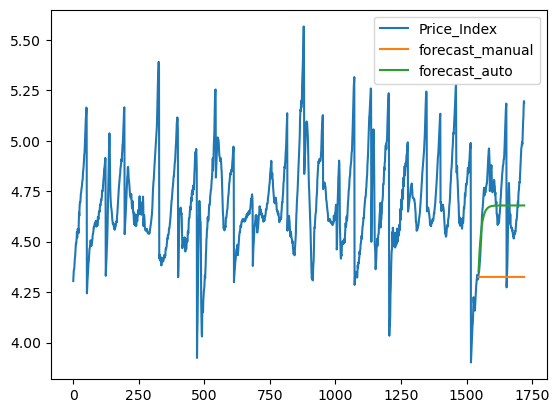

In [116]:
# Its clear the automated model performed better, I could opt to use that in future as it removes the potential subjectivity in the parameter selection

forecast_test_auto = auto_arima.predict(n_periods=len(df4_test))
df4['forecast_auto'] = [None]*len(df4_train) + list(forecast_test_auto)

df4.plot()

In [117]:
# Here I am using the MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), and RMSE (Root Mean Squared Error)to calculate on both of the models.

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df4_test, forecast_test)
mape = mean_absolute_percentage_error(df4_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df4_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')


mae - manual: 0.40393904744533066
mape - manual: 0.08398915889343449
rmse - manual: 0.44525413662456376


In [118]:
mae = mean_absolute_error(df4_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df4_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df4_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.14412352271330958
mape - auto: 0.029941222189007844
rmse - auto: 0.1853878749081346


### As you could have guessed the performance of the Automation parameter selection shows better performance

# Random Forest Regression

In [119]:
df5 = pi.loc[:, ['Price_Index', 'Year']]
df5.head()

y= df5.iloc [:, : -1].values
y = y.astype(float)
x= df5.iloc [:, -1 :].values
x = x.astype(float)

In [120]:
# create regressor object
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(random_state=0)

In [121]:
Y_pred = regressor.predict(np.array([7.8]).reshape(1, 1)) # test the output by changing values

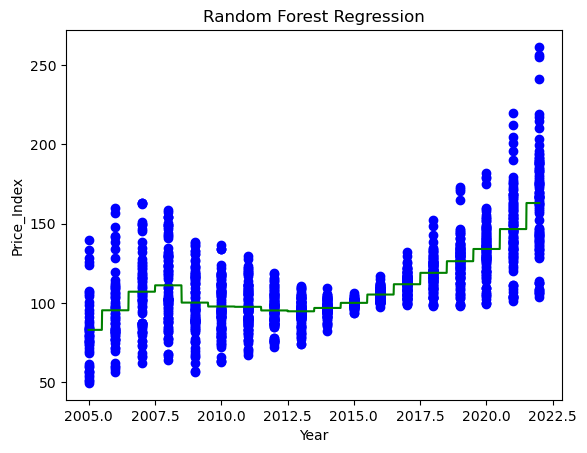

In [122]:
# Visualising the Random Forest Regression results

# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),
       color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Price_Index')
plt.show()


### Random Forest Regression MSE calculations with Year and Price included

In [123]:
X = df5.drop('Year', axis=1)
y = df5['Price_Index']

train_samples = 1000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True,
    test_size=1721 - train_samples,
)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# fit the regressor with x and y training data
regressor.fit(X_train, y_train)

# predict on testing data
y_pred = regressor.predict(X_test)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.83028460106797


### Random Forest Regression MSE calculations with Only Price included

In [125]:
X = df5.drop('Price_Index', axis=1)
y = df5['Price_Index']

train_samples = 1000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True,
    test_size=1721 - train_samples,
)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# fit the regressor with x and y training data
regressor.fit(X_train, y_train)

# predict on testing data
y_pred = regressor.predict(X_test)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  290.9820513671458


## Cross validation Assessment  - 
### ARIMA - Time Series Cross Validation

In [127]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define ARIMA model parameters
p = 2
d = 0
q = 0

# Initialize tscv with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Initialize an array to store the MSE for each fold
mse_arima = np.zeros(5)

# Perform tscv
for i, (train_index, test_index) in enumerate(tscv.split(df5)):
    
    # Split data into training and test sets based on the fold indices
    train_data = df5.iloc[train_index]
    test_data = df5.iloc[test_index]
    
    # Fit ARIMA model on training data
    model = ARIMA(train_data['Price_Index'], order=(p, d, q))
    model_fit = model.fit()
    
    # Make predictions on test data
    y_pred = model_fit.predict(start=test_index[0], end=test_index[-1])
    
    # Calculate MSE for the fold
    mse_arima[i] = np.mean((test_data['Price_Index'] - y_pred)**2)

# Calculate the mean MSE over all folds
mean_mse_arima = np.mean(mse_arima)
print('ARIMA model mean MSE:', mean_mse_arima)


ARIMA model mean MSE: 745.4143459864913


# Random Forest Regression - K-Fold Cross Validation 

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Perform k-fold cross-validation with 5 folds
mse_rf = -cross_val_score(rf_model, df5[['Year']], df5['Price_Index'], cv=5, scoring='neg_mean_squared_error')

# Calculate the mean MSE over all folds
mean_mse_rf = np.mean(mse_rf)
print('Random Forest model mean MSE:', mean_mse_rf)


Random Forest model mean MSE: 308.926801126829


## Sentiment Analysis on House Prices 

In [129]:
# Here is the code I used to pull my batch of Tweets from the Twitter API. This is limited to 100 tweets over the last week however you can see my search parameters.
bearer_token = "Insert your Bearer Token Here"

search_url = "https://api.twitter.com/2/tweets/search/recent"

query_params = {
    # Escaping the character \"
    'query' : "\" housing\" building\" construction\" lang:en -is:retweet",
    'max_results' : '100',
    'tweet.fields': 'author_id',
    'user.fields': 'name'
}

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    return response.json()

json_response = connect_to_endpoint(search_url, query_params)

parsedRes = json.dumps(json_response, indent=4, ensure_ascii=False)
print(parsedRes)

{
    "data": [
        {
            "id": "1654442322065596417",
            "edit_history_tweet_ids": [
                "1654442322065596417"
            ],
            "author_id": "21044269",
            "text": "Construction is afoot on what's believed to be Iowa's first zero-carbon certified building that also will bring affordable housing to Des Moines' burgeoning Ingersoll Avenue. https://t.co/1TzRRsVP1u"
        },
        {
            "id": "1654440839030927361",
            "edit_history_tweet_ids": [
                "1654440839030927361"
            ],
            "author_id": "190824981",
            "text": "The gap between the marginal cost of construction and market price of houses in Canada is a difference of hundreds of thousands of dollars, says Ben Dachis in his latest e-brief. His solutions? Read on: https://t.co/RoTdaHzo0k #CdnPoli #CdnEcon https://t.co/7XF2qGFWk6"
        },
        {
            "id": "1654408222051037185",
            "edit_history_tweet_ids"

In [130]:
# Read in my data and fix the ID column
tweets = pd.read_csv('tweets.csv')
tweets = tweets.reset_index().rename(columns={'index': 'ID'})
tweets.head()

ID        date                                               text
0   0  28/04/2023  @TrueNorthCentre Let\'s be clear, the NDP does...
1   1  28/04/2023  Building owners and developers can apply for u...
2   2  28/04/2023  In the week ending April 21, 2023, the price o...
3   3  28/04/2023  @AnchorsAweigh @completename Lower energy pric...
4   4  28/04/2023  While many turn to tiny homes to reduce their ...

In [131]:
# Make my Tweets lower cases
tweets['text']=tweets['text'].str.lower()
tweets['text'].tail()

93    @libartsndcrafts @pmcondon2 that's the big que...
94    it’s a tragedy that rising interest rates are ...
95    @abubakar_omarr @mobilepunch why should gas pi...
96    @feedthedrummer @pricedoutuk i think one reall...
97    prefab goes by many names, here's a few names ...
Name: text, dtype: object

In [132]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [133]:
# Removing stopwords from my data
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweets['text'] = tweets['text'].apply(lambda text: cleaning_stopwords(text))
tweets['text'].head()

0    @truenorthcentre let\'s clear, ndp not “build"...
1    building owners developers apply $10,000 per u...
2    week ending april 21, 2023, price western spru...
3    @anchorsaweigh @completename lower energy pric...
4    many turn tiny homes reduce bills live simpler...
Name: text, dtype: object

In [134]:
# Removing Punctuation etc from the data
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
tweets['text']= tweets['text'].apply(lambda x: cleaning_punctuations(x))
tweets['text'].tail()

93    libartsndcrafts pmcondon2 thats big question i...
94    it’s tragedy rising interest rates going hobbl...
95    abubakaromarr mobilepunch gas pipeline sold so...
96    feedthedrummer pricedoutuk think one really im...
97    prefab goes many names heres names usually goe...
Name: text, dtype: object

In [135]:
# Removing URLs and special characters
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
tweets['text'] = tweets['text'].apply(lambda x: cleaning_URLs(x))
tweets['text'].tail()

93    libartsndcrafts pmcondon2 thats big question i...
94    it’s tragedy rising interest rates going hobbl...
95    abubakaromarr mobilepunch gas pipeline sold so...
96    feedthedrummer pricedoutuk think one really im...
97    prefab goes many names heres names usually goe...
Name: text, dtype: object

In [136]:
# Removing numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweets['text'] = tweets['text'].apply(lambda x: cleaning_numbers(x))
tweets['text'].tail()

93    libartsndcrafts pmcondon thats big question is...
94    it’s tragedy rising interest rates going hobbl...
95    abubakaromarr mobilepunch gas pipeline sold so...
96    feedthedrummer pricedoutuk think one really im...
97    prefab goes many names heres names usually goe...
Name: text, dtype: object

In [137]:
# Lemmatizing the data

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweets['text'] = tweets['text'].apply(lambda x: lemmatizer_on_text(x))
tweets['text'].head()

0    truenorthcentre lets clear ndp not “build anyt...
1    building owners developers apply  per unit  mi...
2    week ending april   price western sprucepinefi...
3    anchorsaweigh completename lower energy prices...
4    many turn tiny homes reduce bills live simpler...
Name: text, dtype: object

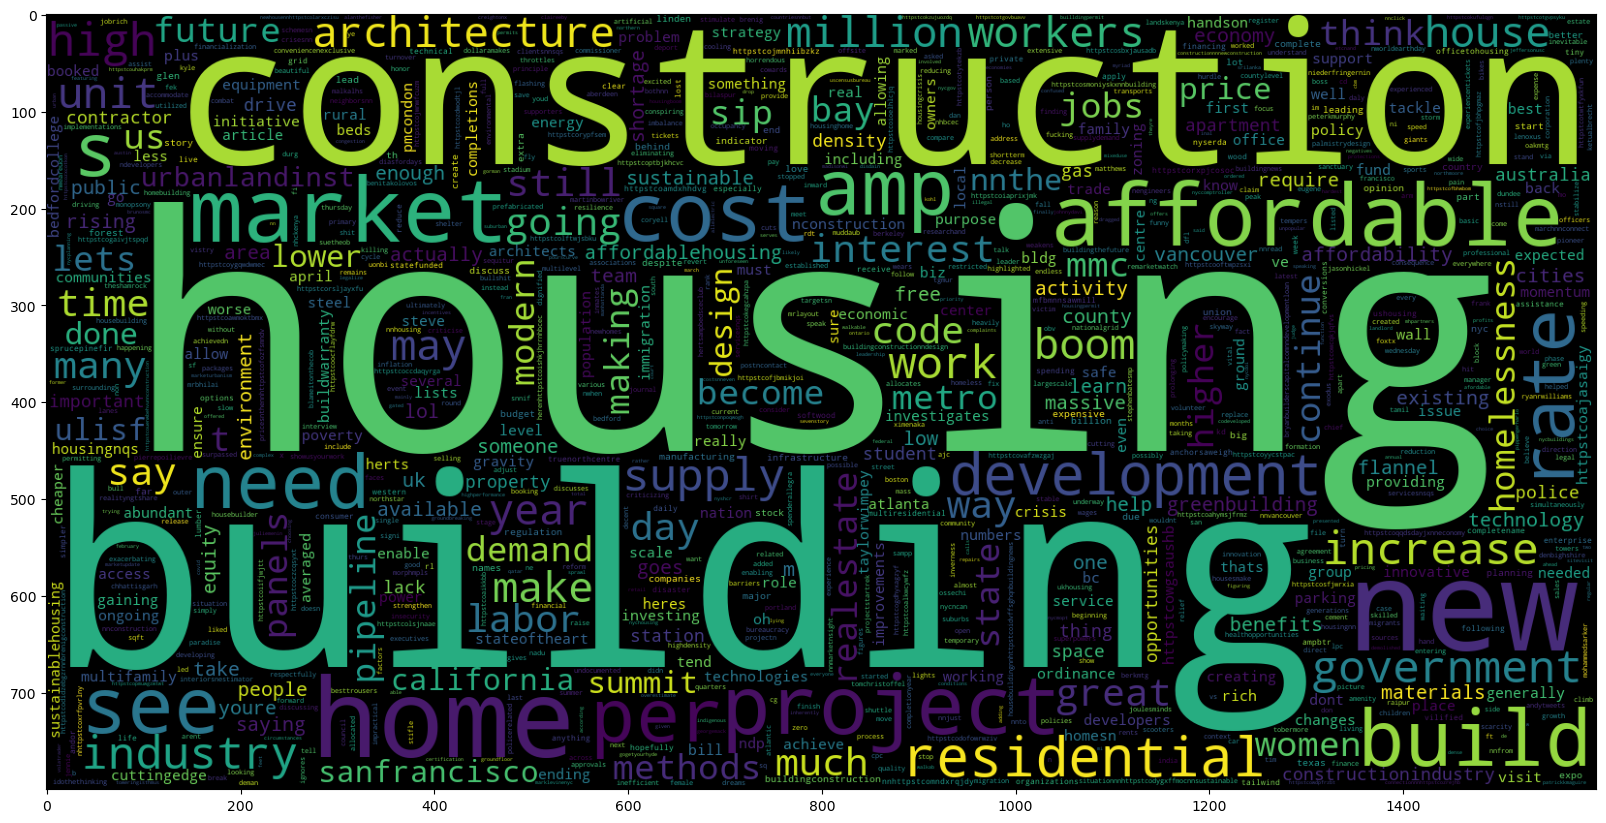

In [138]:
# Word cloud cause I found Like them and at a glance you can see what was stand out words being said in the tweets. 

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(tweets['text']))
plt.imshow(wc)

In [139]:
# Search & Replace for all non-letters
tweet_text = re.sub("[^a-zA-Z]", " ",str(tweets))

In [140]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      98 non-null     int64 
 1   date    98 non-null     object
 2   text    98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [141]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [142]:
# Testing the polarity is working and looking accurate
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [143]:
# Ran the polarity score on the entire dataset
res = {}
for i, row in tqdm(tweets.iterrows(), total=len(tweets)):
    text = row['text']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/98 [00:00<?, ?it/s]

In [144]:
#I merged my sentiment data with the tweets 

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(tweets, how='left')

In [145]:
vaders.head()

ID    neg    neu    pos  compound        date  \
0   0  0.000  0.890  0.110    0.3818  28/04/2023   
1   1  0.000  1.000  0.000    0.0000  28/04/2023   
2   2  0.000  1.000  0.000    0.0000  28/04/2023   
3   3  0.100  0.682  0.218    0.3818  28/04/2023   
4   4  0.226  0.671  0.102   -0.5423  28/04/2023   

                                                text  
0  truenorthcentre lets clear ndp not “build anyt...  
1  building owners developers apply  per unit  mi...  
2  week ending april   price western sprucepinefi...  
3  anchorsaweigh completename lower energy prices...  
4  many turn tiny homes reduce bills live simpler...

In [146]:
vaders.describe()

ID        neg        neu        pos   compound
count  98.000000  98.000000  98.000000  98.000000  98.000000
mean   48.500000   0.064459   0.826827   0.108684   0.125903
std    28.434134   0.095381   0.140212   0.119986   0.465449
min     0.000000   0.000000   0.444000   0.000000  -0.916100
25%    24.250000   0.000000   0.739250   0.000000  -0.141775
50%    48.500000   0.000000   0.850000   0.087500   0.000000
75%    72.750000   0.103500   0.925750   0.170000   0.472225
max    97.000000   0.406000   1.000000   0.508000   0.926000

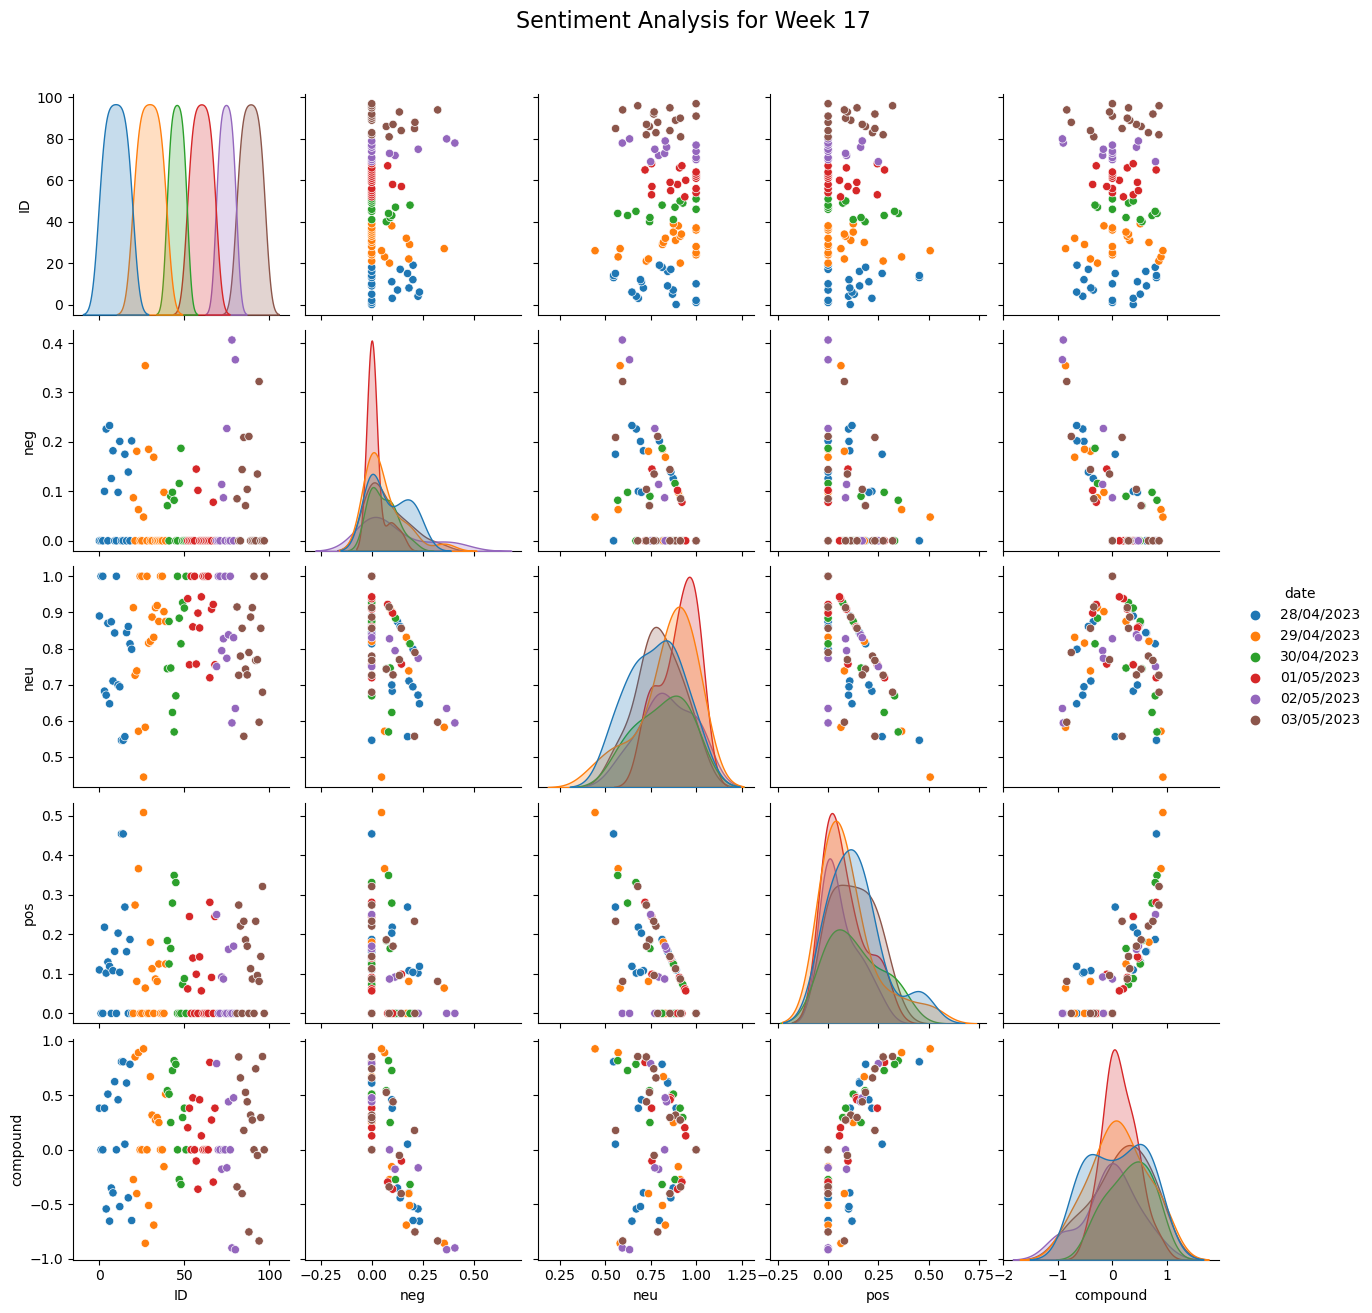

In [147]:
# Here I am using Pairplot here to further identify any additonal correlations in the sentiment

ax_ptrans = sns.pairplot(vaders, hue='date')

plt.suptitle("Sentiment Analysis for Week 17", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

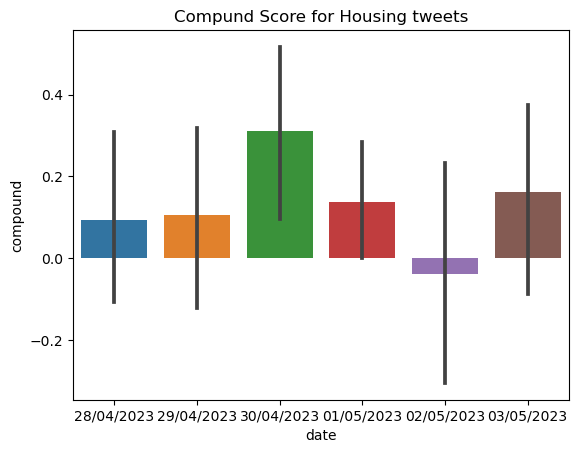

In [148]:
# Plotting a graph to show the sentiment by day and its range.
ax = sns.barplot(data=vaders, x='date', y='compound')
ax.set_title('Compund Score for Housing tweets')
plt.show()

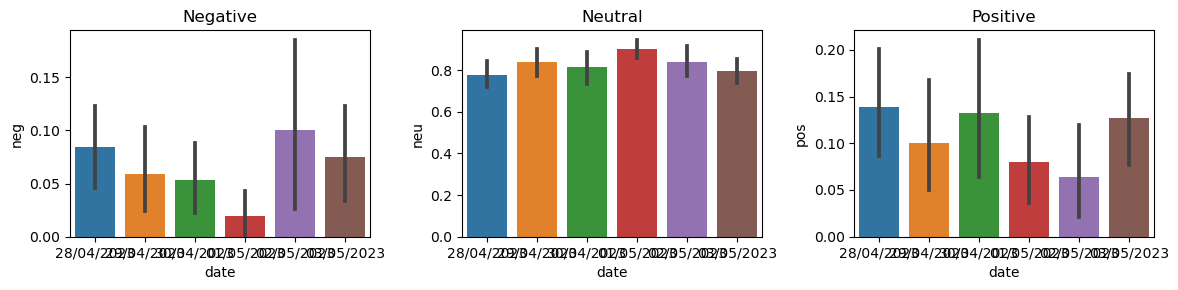

In [149]:
# Split the scores by sentiment type 
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='date', y='neg', ax=axs[0])
sns.barplot(data=vaders, x='date', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='date', y='pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.tight_layout()
plt.show()